<a href="https://colab.research.google.com/github/terrenceturner/End-to-end-plane-vision/blob/master/Plane_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#✈️ End-to-end Plane Vision

## 1. Problem Definition
> How well can the model detect an aircraft given a satellite image?

## 2. Data
* The satellite images are downloaded from: https://www.kaggle.com/rhammell/planesnet

## 3. Evaluation
* This will be a CNN (Convolutional Neural Network) project using VGG16 pre-trained model

## 4. Features



In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub 
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

TF version: 2.3.0
TF Hub version: 0.8.0


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Aug 17 22:06:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |     10MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from pathlib import Path

input_path = Path('/content/drive/My Drive/Planes/PlanesSatellite/planesnet')
planes_path = input_path

In [ ]:
import os
import pandas as pd


planes = []

all_planes = os.listdir(planes_path)
    # Add them to the list
for ac in all_planes:
    planes.append((ac[0],str(planes_path)+"/"+str(ac)))

planes[:10]

[('0',
  '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20160808_000532_1_0c79__-122.40658299_37.7216144837.png'),
 ('0',
  '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170713_175015_0f15__-118.13148884378253_33.814284499515054.png'),
 ('0',
  '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20161127_180618_0e30__-121.83881549313452_38.696972970560125.png'),
 ('1',
  '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20160822_181156_0c42__-122.380273325_37.6170837623.png'),
 ('0',
  '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170613_174901_1036__-118.40259452914894_33.93965499725705.png'),
 ('0',
  '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170309_174809_0e26__-117.516904054_34.0539736714.png'),
 ('0',
  '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170627_174937_1015__-118.38150008683924_33.92182141379013.png'),
 ('0',
  '/content/drive/My Drive/Planes/PlanesSatellite/planesne

In [ ]:
# Build a dataframe        
plane_df = pd.DataFrame(data=planes, columns=['labels','image_path'], index=None)
plane_df.head(10)

,labels,image_path
0,0,/content/drive/My Drive/Planes/PlanesSatellite...
1,0,/content/drive/My Drive/Planes/PlanesSatellite...
2,0,/content/drive/My Drive/Planes/PlanesSatellite...
3,1,/content/drive/My Drive/Planes/PlanesSatellite...
4,0,/content/drive/My Drive/Planes/PlanesSatellite...
5,0,/content/drive/My Drive/Planes/PlanesSatellite...
6,0,/content/drive/My Drive/Planes/PlanesSatellite...
7,0,/content/drive/My Drive/Planes/PlanesSatellite...
8,0,/content/drive/My Drive/Planes/PlanesSatellite...
9,0,/content/drive/My Drive/Planes/PlanesSatellite...


In [ ]:
no_plane = plane_df.loc[plane_df['labels'] == '0']
no_plane

,labels,image_path
0,0,/content/drive/My Drive/Planes/PlanesSatellite...
1,0,/content/drive/My Drive/Planes/PlanesSatellite...
2,0,/content/drive/My Drive/Planes/PlanesSatellite...
4,0,/content/drive/My Drive/Planes/PlanesSatellite...
5,0,/content/drive/My Drive/Planes/PlanesSatellite...
...,...,...
32015,0,/content/drive/My Drive/Planes/PlanesSatellite...
32016,0,/content/drive/My Drive/Planes/PlanesSatellite...
32017,0,/content/drive/My Drive/Planes/PlanesSatellite...
32018,0,/content/drive/My Drive/Planes/PlanesSatellite...


In [ ]:
no_plane = no_plane.drop(columns='labels')
no_plane.head()

,image_path
0,/content/drive/My Drive/Planes/PlanesSatellite...
1,/content/drive/My Drive/Planes/PlanesSatellite...
2,/content/drive/My Drive/Planes/PlanesSatellite...
4,/content/drive/My Drive/Planes/PlanesSatellite...
5,/content/drive/My Drive/Planes/PlanesSatellite...


In [ ]:
# Create pathnames from image ID's
no_plane_filenames = [fname for fname in no_plane["image_path"]]

# Check the first 10
no_plane_filenames[:10]

['/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20160808_000532_1_0c79__-122.40658299_37.7216144837.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170713_175015_0f15__-118.13148884378253_33.814284499515054.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20161127_180618_0e30__-121.83881549313452_38.696972970560125.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170613_174901_1036__-118.40259452914894_33.93965499725705.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170309_174809_0e26__-117.516904054_34.0539736714.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170627_174937_1015__-118.38150008683924_33.92182141379013.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20151223_185617_0c47__-121.4833456163908_38.617694962636186.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170625_181137_0e0e__-122.05969922075654_37.390013215639

In [ ]:
from IPython.display import Image
Image(no_plane_filenames[0], width=100, height=100)

In [ ]:
plane = plane_df.loc[plane_df['labels'] == '1']
plane

,labels,image_path
3,1,/content/drive/My Drive/Planes/PlanesSatellite...
16,1,/content/drive/My Drive/Planes/PlanesSatellite...
18,1,/content/drive/My Drive/Planes/PlanesSatellite...
22,1,/content/drive/My Drive/Planes/PlanesSatellite...
24,1,/content/drive/My Drive/Planes/PlanesSatellite...
...,...,...
22994,1,/content/drive/My Drive/Planes/PlanesSatellite...
22996,1,/content/drive/My Drive/Planes/PlanesSatellite...
22997,1,/content/drive/My Drive/Planes/PlanesSatellite...
22998,1,/content/drive/My Drive/Planes/PlanesSatellite...


In [ ]:
plane = plane.drop(columns='labels')
plane.head()

,image_path
3,/content/drive/My Drive/Planes/PlanesSatellite...
16,/content/drive/My Drive/Planes/PlanesSatellite...
18,/content/drive/My Drive/Planes/PlanesSatellite...
22,/content/drive/My Drive/Planes/PlanesSatellite...
24,/content/drive/My Drive/Planes/PlanesSatellite...


In [ ]:
# Create pathnames from image ID's
plane_filenames = [fname for fname in plane["image_path"]]

# Check the first 10
plane_filenames[:10]

['/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20160822_181156_0c42__-122.380273325_37.6170837623.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20161022_170547_0c24__-117.863023667_33.6783103947.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20170113_174500_0e0e__-117.197668116_32.7336984724.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20170602_010248_0c44__-122.39177122430853_37.61734870458451.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20170613_180706_1040__-122.21484983141934_37.72033783306543.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20160829_194836_0c18__-117.203358906_32.734556004.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20170620_180743_102f__-122.39247318264107_37.618924969960304.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20170620_180744_102f__-122.39065804533628_37.61211303511796.png',
 '/content/d

In [ ]:

Image(plane_filenames[0], width=100, height=100)

In [ ]:
# import os module 
import os 
  
# change the current working directory  
# to specified path 
os.chdir('/content/drive/My Drive/Planes/PlanesSatellite/')
#os.chdir('/content/drive/My Drive/Planes/PlanesSatellite/train_directory/0')
  
# varify the path using getcwd() 
cwd = os.getcwd() 
  
# print the current directory 
print("Current working directory is:", cwd) 

Current working directory is: /content/drive/My Drive/Planes/PlanesSatellite


In [ ]:
# Python program to explain os.mkdir() method  

# Directory 
directory = ('validation_directory/1')
  
# Parent Directory path 
parent_dir = '/content/drive/My Drive/Planes/PlanesSatellite/'
  
# Path 
path = os.path.join(parent_dir, directory) 
#path.mkdir(parents=True, exist_ok=True)
  
# Create the directory  
os.makedirs(path) 
print("Directory '%s' created" %directory) 

Directory 'validation_directory/1' created


In [ ]:
'''import json
with open("no_plane.json", "w") as no_plane_files:
  json.dump(no_plane_filenames, no_plane_files)'''


In [ ]:
no_plane_filenames[0].split('/')[-1]

'0__20160808_000532_1_0c79__-122.40658299_37.7216144837.png'

### Copying images into train directory

In [ ]:
!pip install pyfastcopy

  Created wheel for pyfastcopy: filename=pyfastcopy-1.0.3-cp36-none-any.whl size=3769 sha256=46aa37eba66402609400122f08150f5c4b2208b78b090c30ee2c78a0903371d3
  Stored in directory: /root/.cache/pip/wheels/43/ef/5b/424484e3955a0ac0e364fbf2648aaaab4be135b69a8b2b216d
Successfully built pyfastcopy


### Copy train files

In [ ]:
import pyfastcopy
import shutil

for item in no_plane_filenames[:1000]:
  filename = item.split('/')[-1]
  shutil.copyfile(item, '/content/drive/My Drive/Planes/PlanesSatellite/train_directory/0/' + filename)
  

In [ ]:
for item in plane_filenames[:1000]:
  filename = item.split('/')[-1]
  shutil.copyfile(item, '/content/drive/My Drive/Planes/PlanesSatellite/train_directory/1/' + filename)

### Copy test files

In [ ]:
for item in no_plane_filenames[:1000]:
  filename = item.split('/')[-1]
  shutil.copyfile(item, '/content/drive/My Drive/Planes/PlanesSatellite/test_directory/0/' + filename)

In [ ]:
for item in plane_filenames[:1000]:
  filename = item.split('/')[-1]
  shutil.copyfile(item, '/content/drive/My Drive/Planes/PlanesSatellite/test_directory/1/' + filename)

###Copy Validation Files

In [ ]:
for item in no_plane_filenames[:1000]:
  filename = item.split('/')[-1]
  shutil.copyfile(item, '/content/drive/My Drive/Planes/PlanesSatellite/validation_directory/0/' + filename)

In [ ]:
for item in plane_filenames[:1000]:
  filename = item.split('/')[-1]
  shutil.copyfile(item, '/content/drive/My Drive/Planes/PlanesSatellite/validation_directory/1/' + filename)

In [ ]:

#plane_df = pd.DataFrame.from_dict(plane_dict)
print(plane_df.describe())
print(plane_df.head())

       labels                                         image_path
count   32020                                              32020
unique      3                                              32020
top         0  /content/drive/My Drive/Planes/PlanesSatellite...
freq    24013                                                  1
  labels                                         image_path
0      0  /content/drive/My Drive/Planes/PlanesSatellite...
1      0  /content/drive/My Drive/Planes/PlanesSatellite...
2      0  /content/drive/My Drive/Planes/PlanesSatellite...
3      1  /content/drive/My Drive/Planes/PlanesSatellite...
4      0  /content/drive/My Drive/Planes/PlanesSatellite...


In [ ]:
plane_df.head()

,labels,image_path
0,0,/content/drive/My Drive/Planes/PlanesSatellite...
1,0,/content/drive/My Drive/Planes/PlanesSatellite...
2,0,/content/drive/My Drive/Planes/PlanesSatellite...
3,1,/content/drive/My Drive/Planes/PlanesSatellite...
4,0,/content/drive/My Drive/Planes/PlanesSatellite...


In [ ]:
plane_df.tail()

,labels,image_path
32015,0,/content/drive/My Drive/Planes/PlanesSatellite...
32016,0,/content/drive/My Drive/Planes/PlanesSatellite...
32017,0,/content/drive/My Drive/Planes/PlanesSatellite...
32018,0,/content/drive/My Drive/Planes/PlanesSatellite...
32019,0,/content/drive/My Drive/Planes/PlanesSatellite...


In [ ]:
plane_df = plane_df[plane_df["labels"] != "."]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Total number of planes images in the dataset:  32019


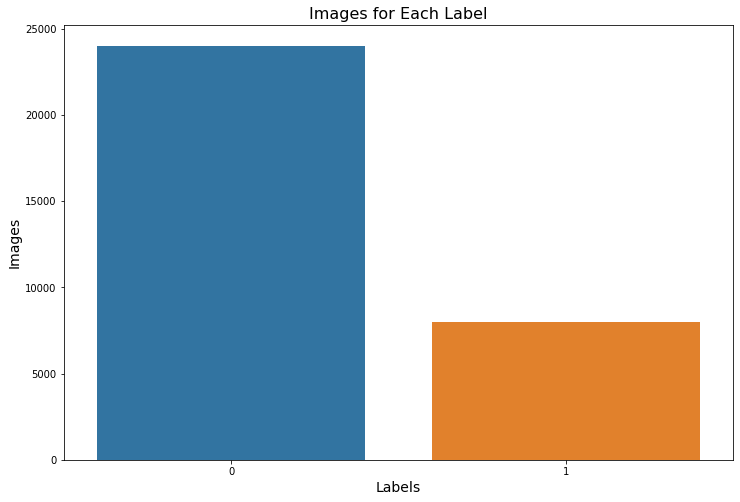

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# How many images are there of each label
print("Total number of planes images in the dataset: ", len(plane_df))
ac_count = plane_df['labels'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=ac_count.index, y=ac_count.values)
plt.title("Images for Each Label", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Images", fontsize=14)
plt.show()

In [ ]:
# 0 = No Plane, 1 = Plane
plane_df["labels"].value_counts()

0    24013
1     8006
Name: labels, dtype: int64

In [ ]:
# What's the median number of images per class?
plane_df["labels"].value_counts().median()

16009.5

In [ ]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20170620_175442_0e30__-118.4075305023046_33.941595642905035.png", width=100, height=100)

In [ ]:
import glob
# Create pathnames from image ID's
#filenames = glob.glob('/content/drive/My Drive/Planes/PlanesSatellite/planesnet/*')
filenames = [fname for fname in plane_df["image_path"]]



# Check the first 10
filenames[:10]

['/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20160808_000532_1_0c79__-122.40658299_37.7216144837.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170713_175015_0f15__-118.13148884378253_33.814284499515054.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20161127_180618_0e30__-121.83881549313452_38.696972970560125.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/1__20160822_181156_0c42__-122.380273325_37.6170837623.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170613_174901_1036__-118.40259452914894_33.93965499725705.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170309_174809_0e26__-117.516904054_34.0539736714.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20170627_174937_1015__-118.38150008683924_33.92182141379013.png',
 '/content/drive/My Drive/Planes/PlanesSatellite/planesnet/0__20151223_185617_0c47__-121.4833456163908_38.617694962636186.png',


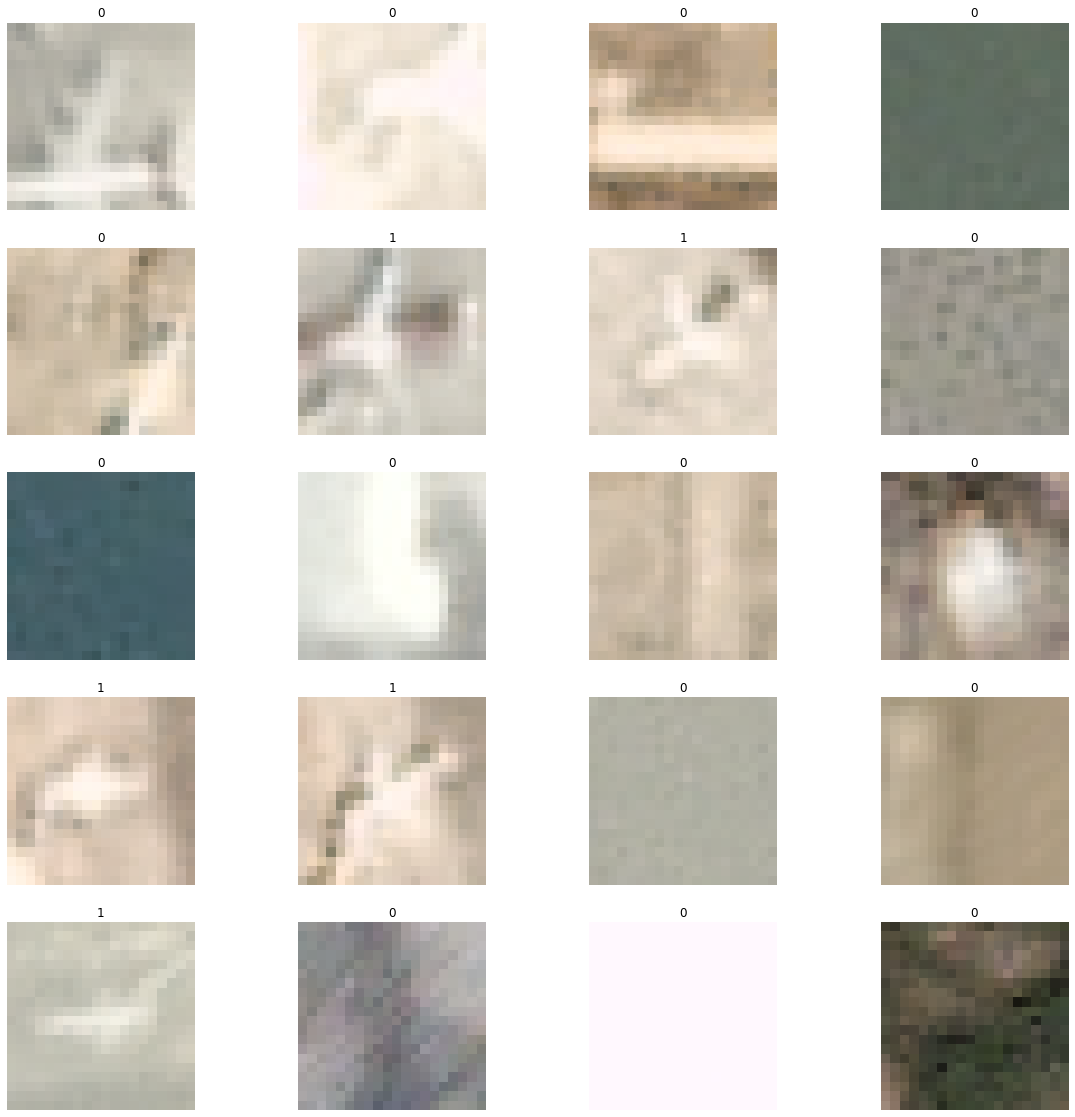

In [ ]:
random_samples = []

for item in plane_df.sample(20).iterrows():
    random_samples.append((item[1].labels, item[1].image_path))

f, ax = plt.subplots(5,4, figsize=(20,20))
for i,sample in enumerate(random_samples):
    ax[i//4, i%4].imshow(plt.imread(random_samples[i][1]))
    ax[i//4, i%4].set_title(random_samples[i][0])
    ax[i//4, i%4].axis('off')
plt.show()

In [ ]:
# One more check
Image(filenames[1000], width=100, height=100)

## 5. Modeling

### Initialize VGG16 model

In [ ]:
from tensorflow.keras.applications import vgg16

# Init the VGG model
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fdb65799e80> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdb32cde2b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdb32cde5c0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdb32cde9e8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdb324436d8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdb3245d1d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdb3245d9b0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdb20180160> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdb20180f98> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdb2018a438> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fdb2018ac88> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

### Create the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.utils import shuffle

# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 15,242,050
Trainable params: 527,362
Non-trainable params: 14,714,688
_________________________________________________________________


### Load the Images

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Load the normalized images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10


train_dir = '/content/drive/My Drive/Planes/PlanesSatellite/train_directory/'
validation_dir = '/content/drive/My Drive/Planes/PlanesSatellite/validation_directory/'

# Data generator for training data
train_generator = train_datagen.flow_from_directory(
        train_dir[:NUM_IMAGES],
        target_size=(32, 32),
        batch_size=train_batchsize,
        class_mode='categorical')


# Data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir[:NUM_IMAGES],
        target_size=(32, 32),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Compile and Train the Model

In [ ]:
# Configure the model for training
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['categorical_accuracy'])

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=
         train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator, 
      validation_steps=
         validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/10
20/20 [==============================] - 5s 255ms/step - loss: 0.6605 - categorical_accuracy: 0.6895 - val_loss: 0.3937 - val_categorical_accuracy: 0.8265
Epoch 2/10
20/20 [==============================] - 5s 239ms/step - loss: 0.4232 - categorical_accuracy: 0.7985 - val_loss: 0.5668 - val_categorical_accuracy: 0.7395
Epoch 3/10
20/20 [==============================] - 5s 237ms/step - loss: 0.4304 - categorical_accuracy: 0.7995 - val_loss: 0.3772 - val_categorical_accuracy: 0.8260
Epoch 4/10
20/20 [==============================] - 5s 237ms/step - loss: 0.3586 - categorical_accuracy: 0.8395 - val_loss: 0.5100 - val_categorical_accuracy: 0.7675
Epoch 5/10
20/20 [==============================] - 5s 241ms/step - loss: 0.3465 - categorical_accuracy: 0.8445 - val_loss: 0.3611 - val_categorical_accuracy: 0.8315
Epoch 6/10
20/20 [==============================] - 5s 238ms/step - loss: 0.3207 - categorical_accuracy: 0.8635 - val_loss: 0.4318 - val_categorical_accuracy: 0.8025
Epoc

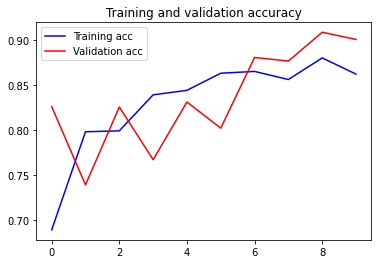

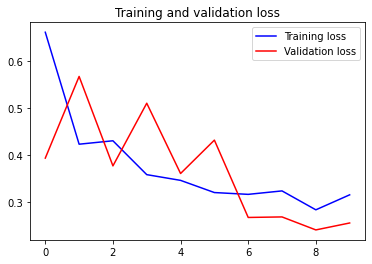

In [ ]:
import matplotlib.pyplot as plt

# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(history)

### Check Performance

In [ ]:
import numpy as np
from keras.preprocessing.image import load_img

# Utility function for obtaining of the errors 
def obtain_errors(val_generator, predictions):
    # Get the filenames from the generator
    fnames = validation_generator.filenames

    # Get the ground truth from generator
    ground_truth = validation_generator.classes

    # Get the dictionary of classes
    label2index = validation_generator.class_indices

    # Obtain the list of the classes
    idx2label = list(label2index.keys())
    print('The list of classes: ', idx2label)

    # Get the class index
    predicted_classes = np.argmax(predictions, axis=1)

    errors = np.where(predicted_classes != ground_truth)[0]
    print('Number of errors = {}/{}'.format(len(errors),validation_generator.samples))
    
    return idx2label, errors, fnames


# Utility function for visualization of the errors
def show_errors(idx2label, errors, predictions, fnames):
    # Show the errors
    for i in range(len(errors)):
        pred_class = np.argmax(predictions[errors[i]])
        pred_label = idx2label[pred_class]

        title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
            fnames[errors[i]].split('/')[0],
            pred_label,
            predictions[errors[i]][pred_class])

        original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
        plt.figure(figsize=[7,7])
        plt.axis('off')
        plt.title(title)
        plt.imshow(original)
        plt.show()

200/200 [==============================] - 3s 14ms/step
The list of classes:  ['0', '1']
Number of errors = 198/2000


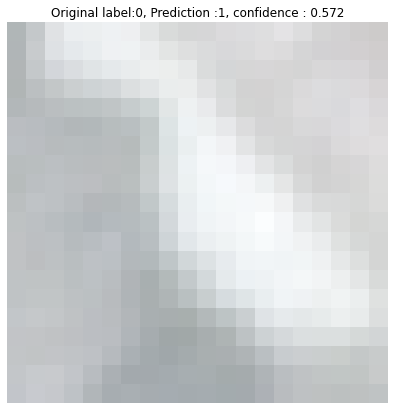

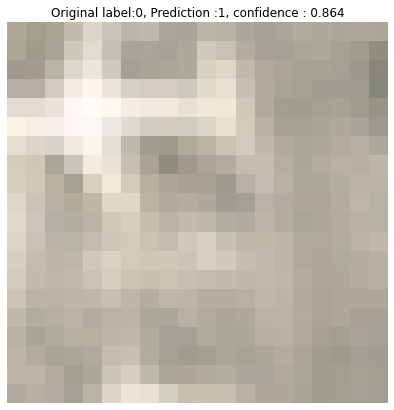

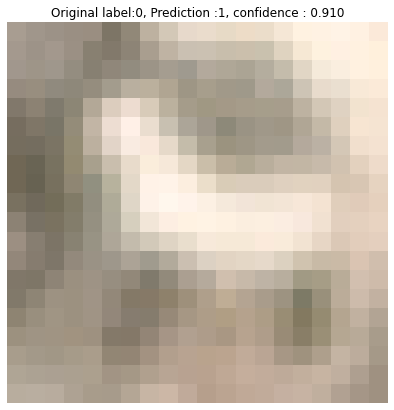

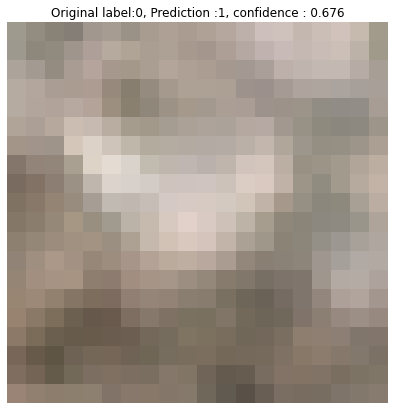

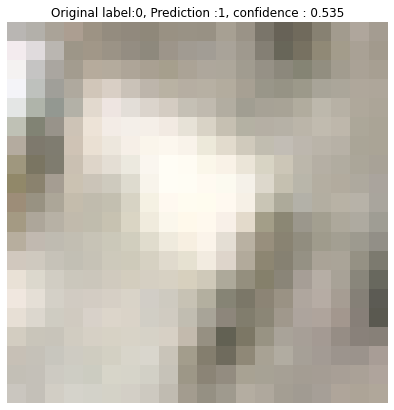

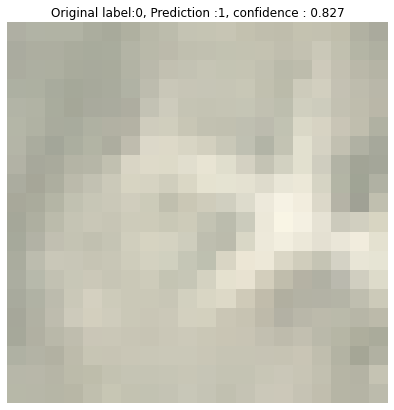

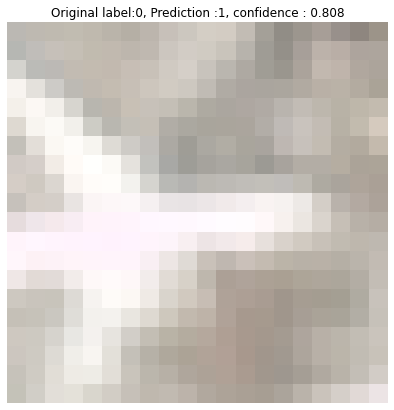

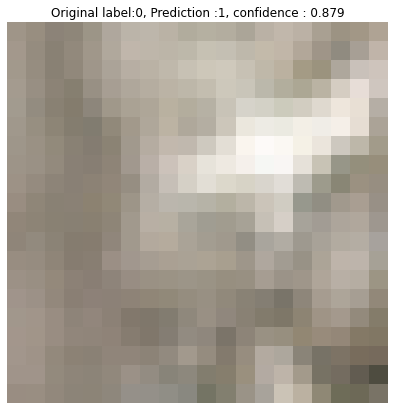

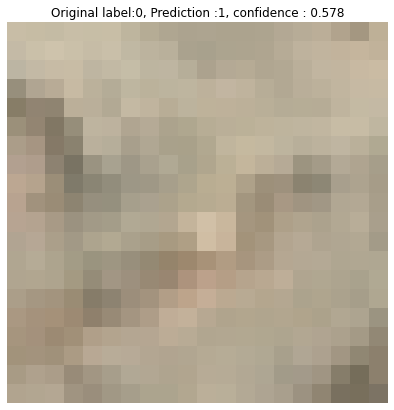

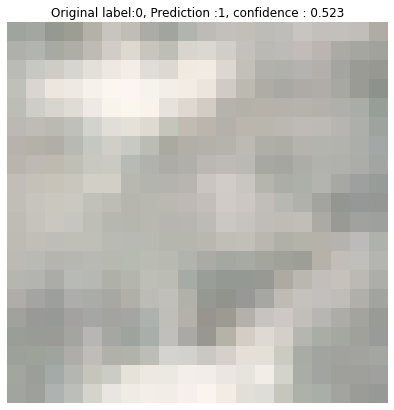

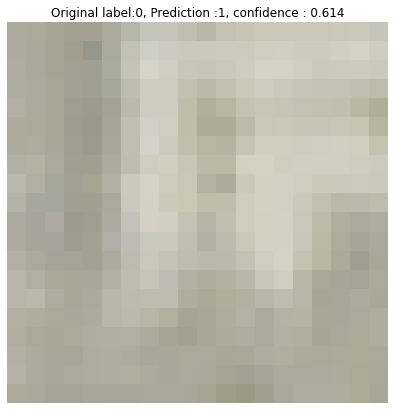

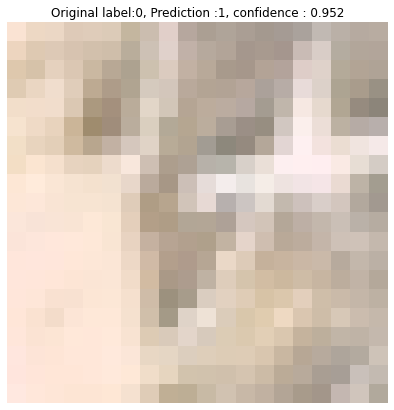

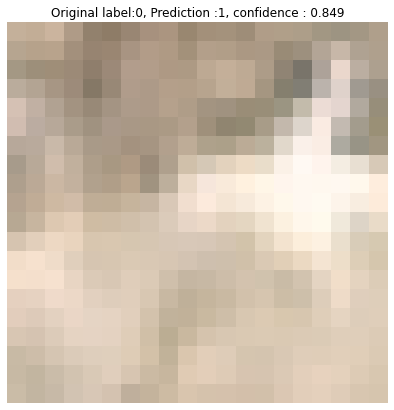

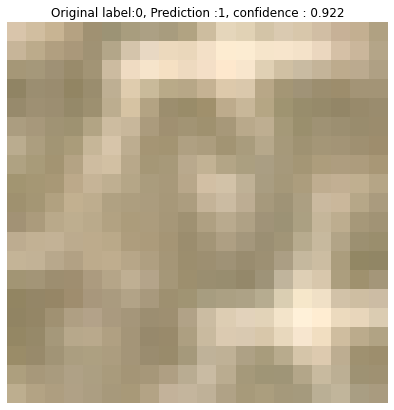

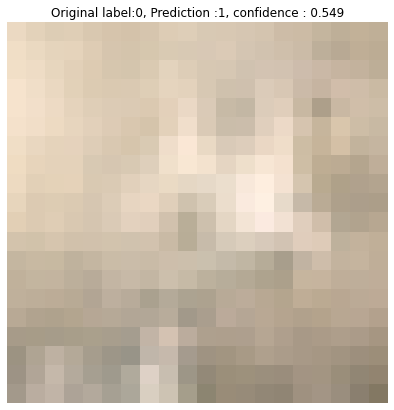

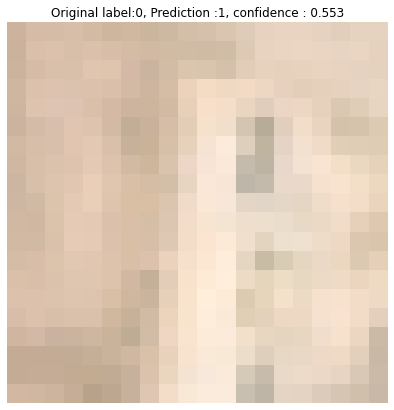

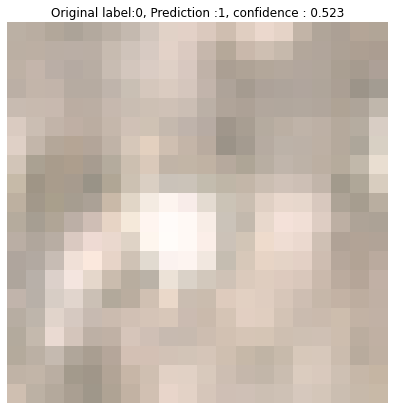

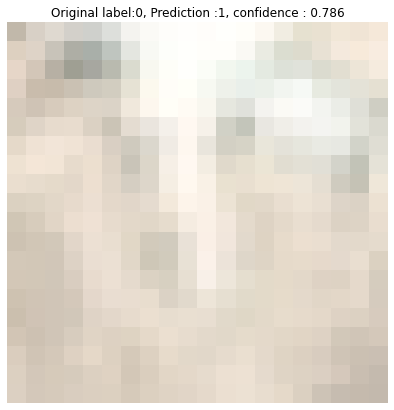

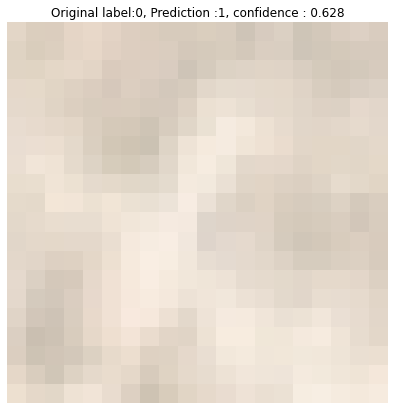

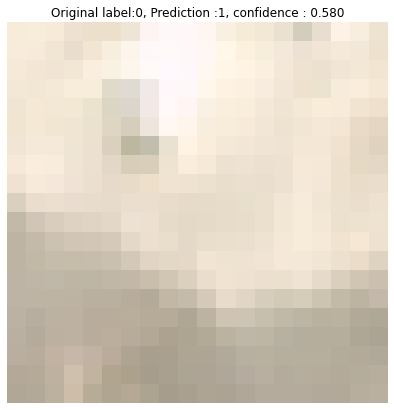

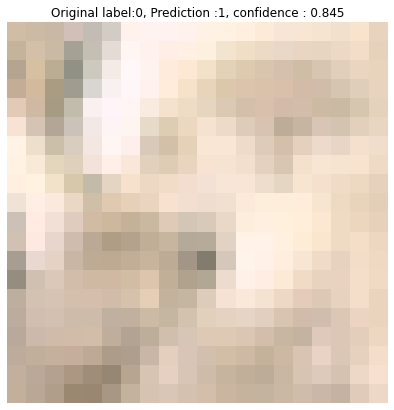

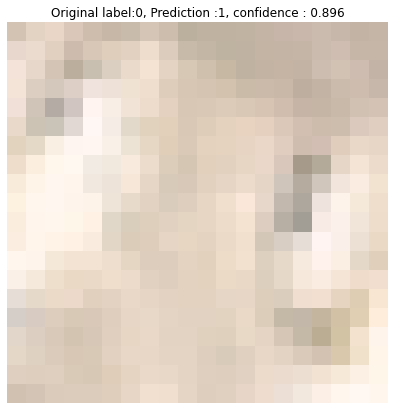

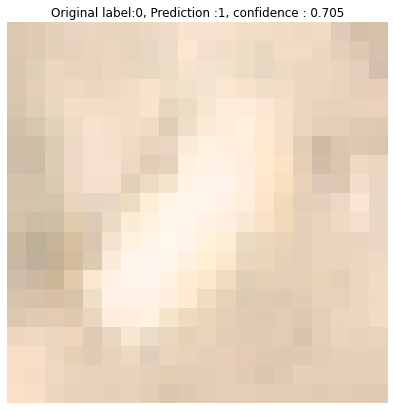

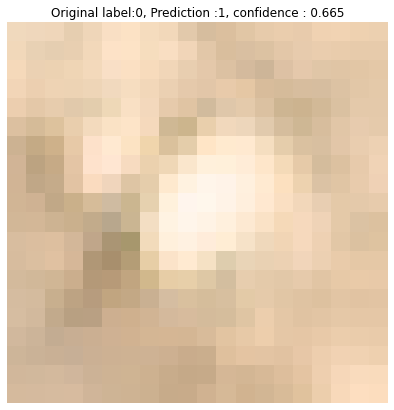

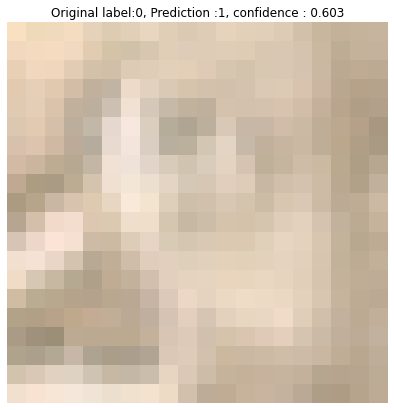

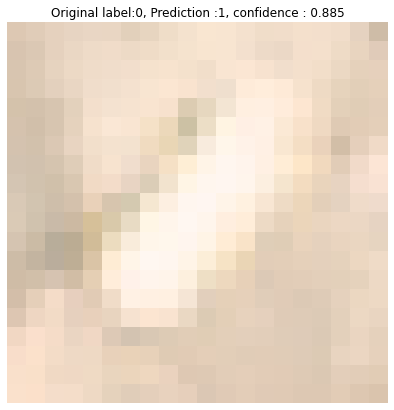

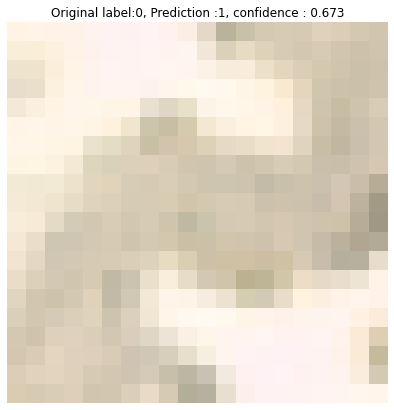

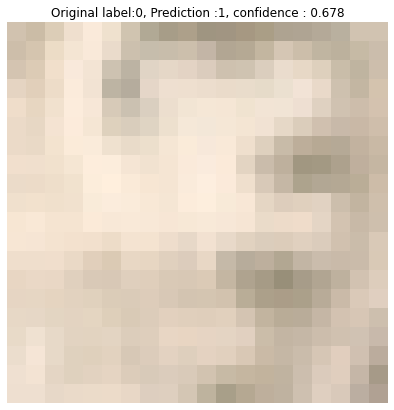

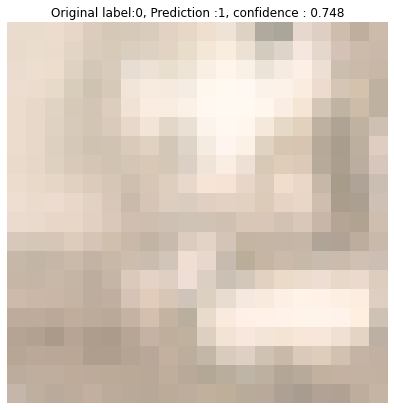

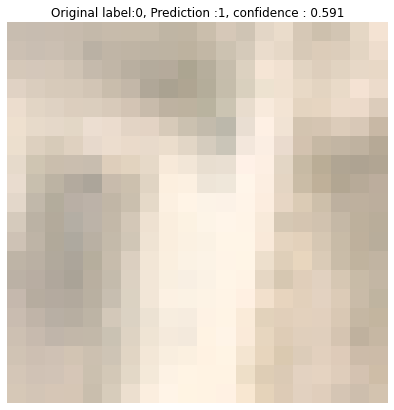

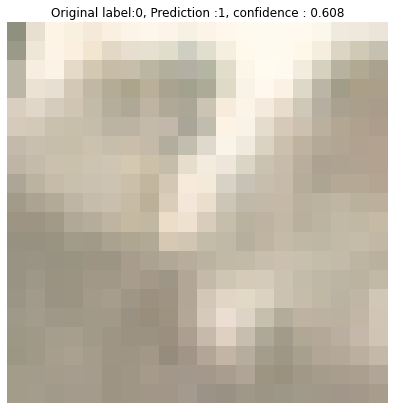

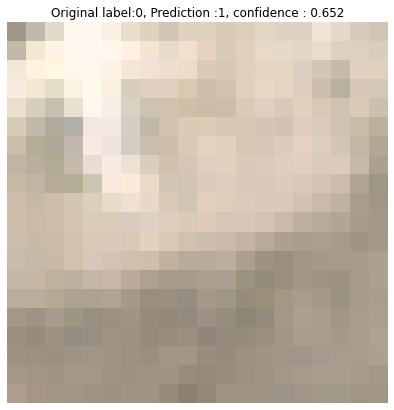

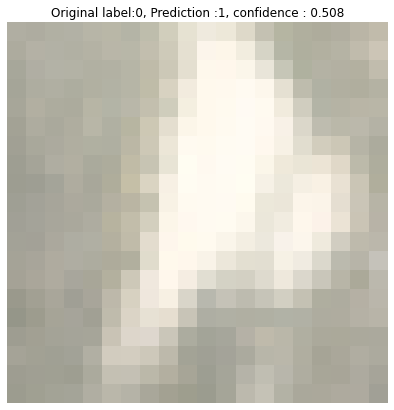

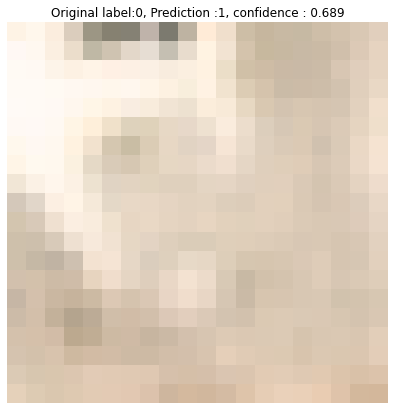

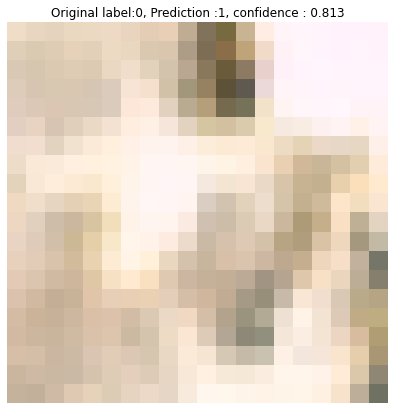

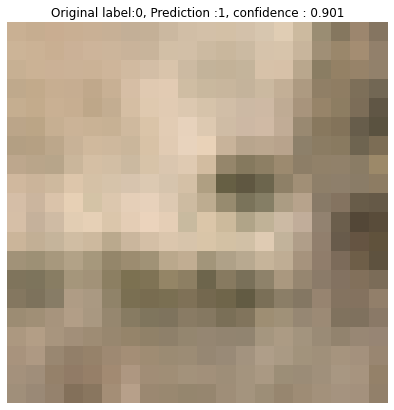

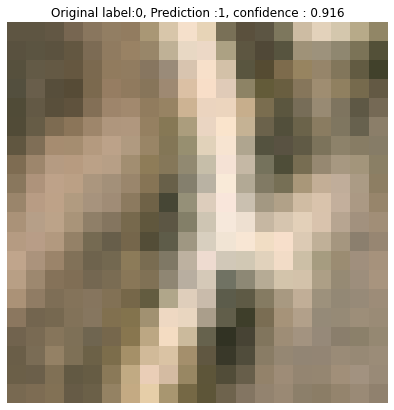

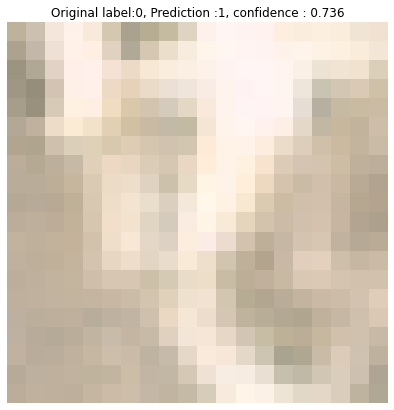

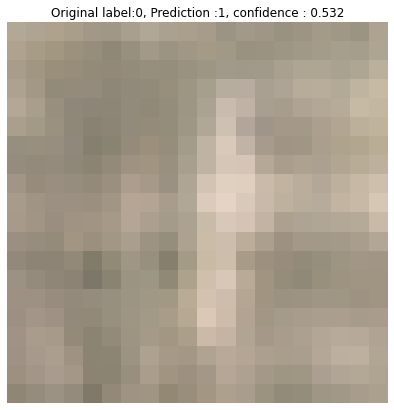

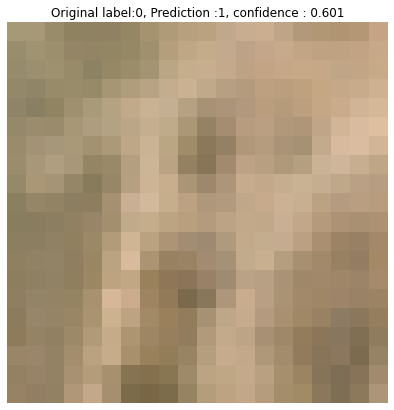

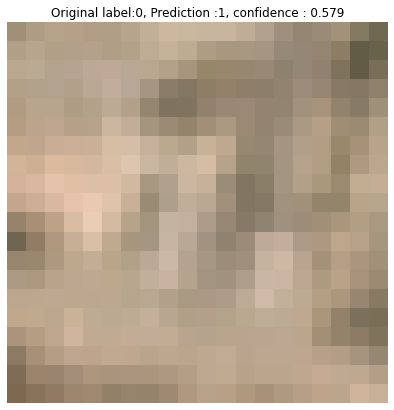

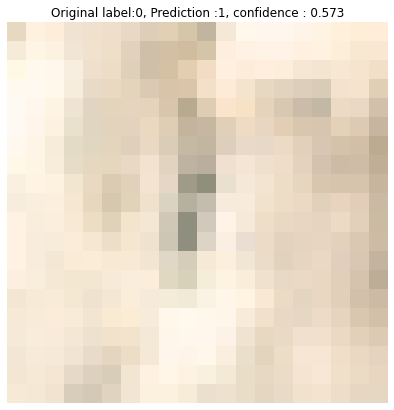

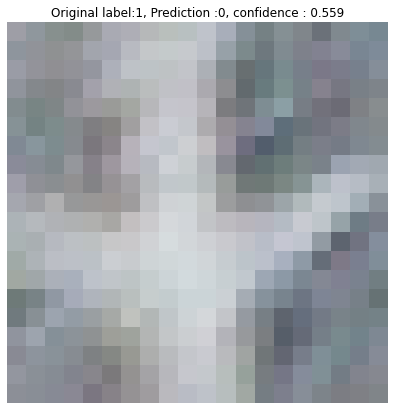

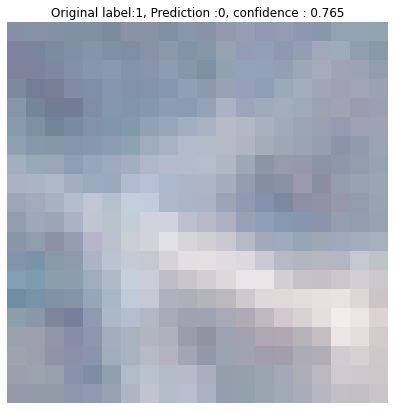

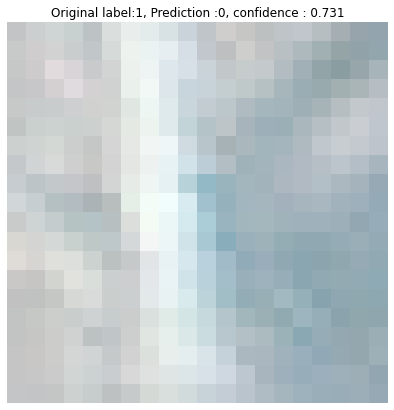

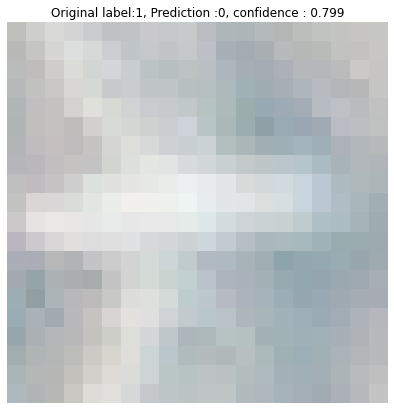

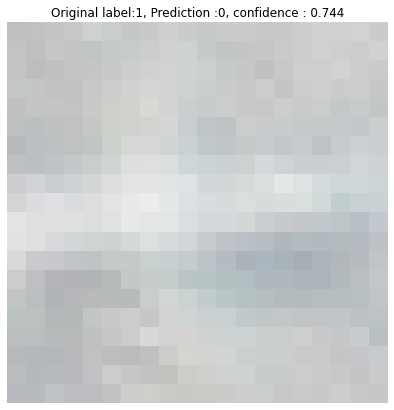

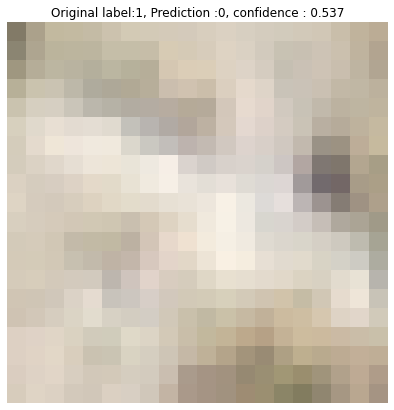

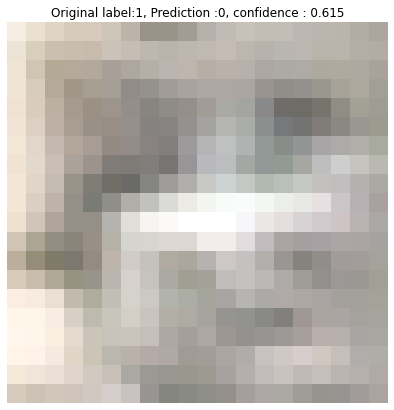

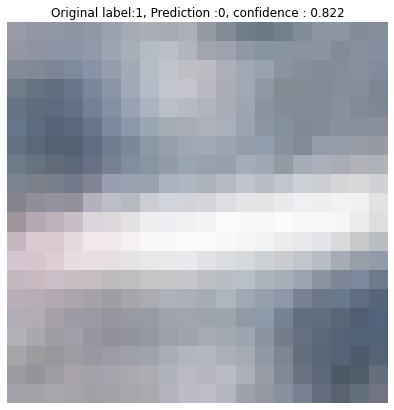

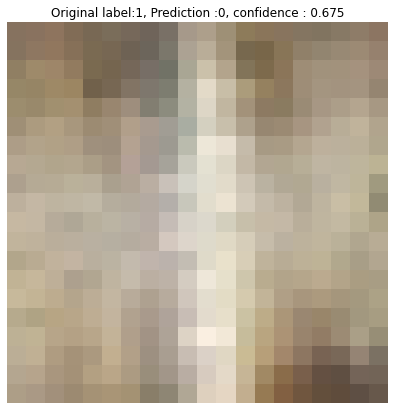

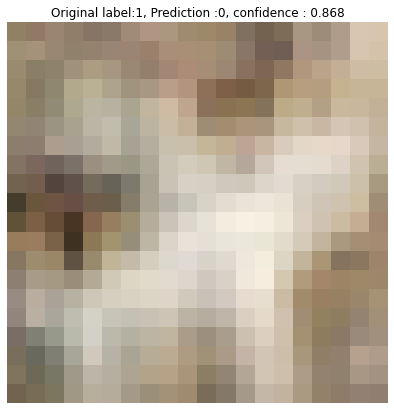

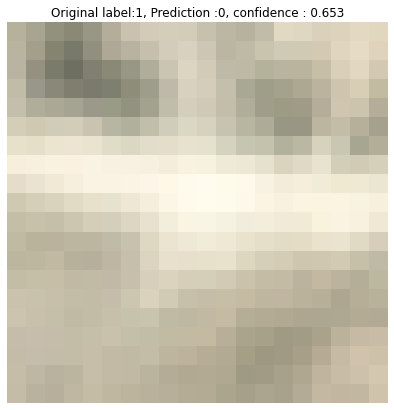

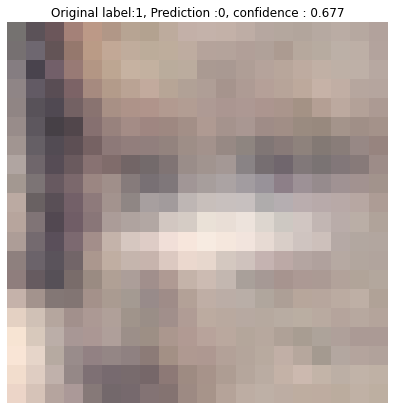

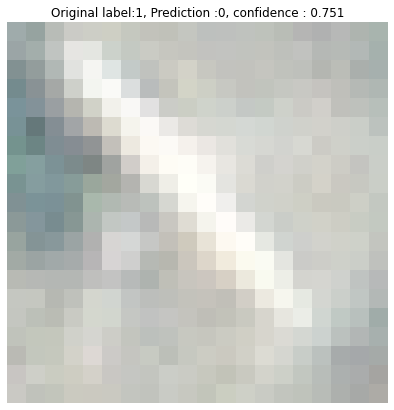

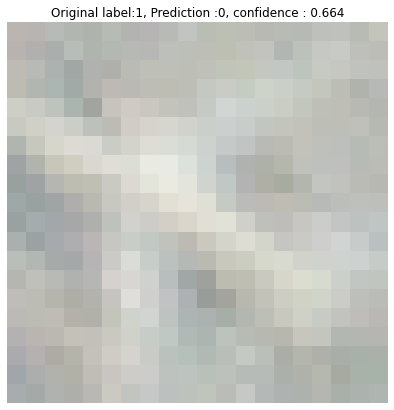

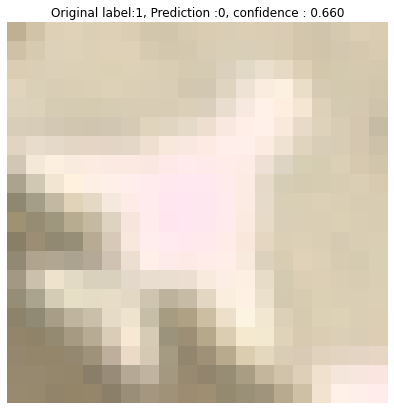

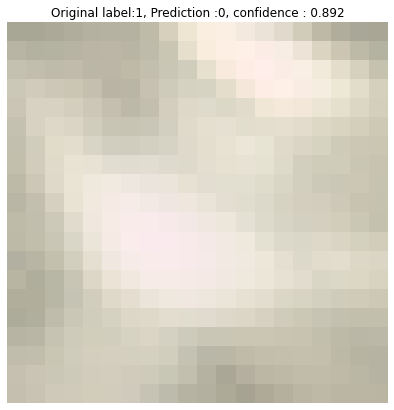

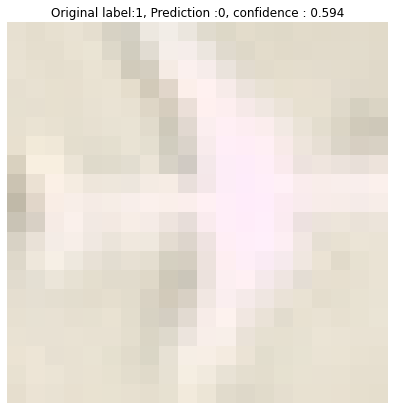

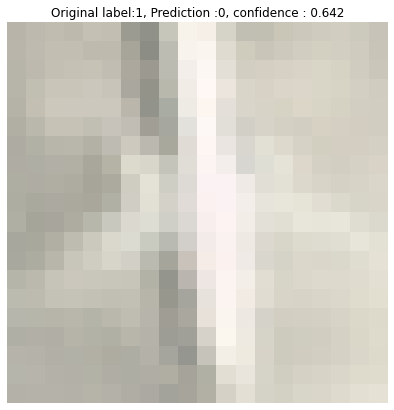

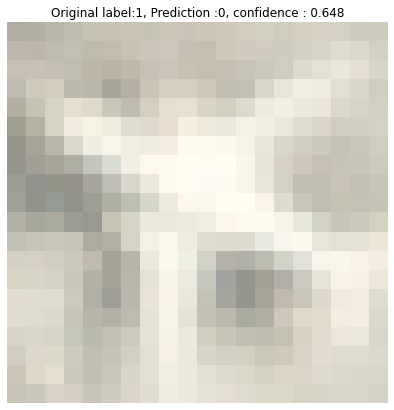

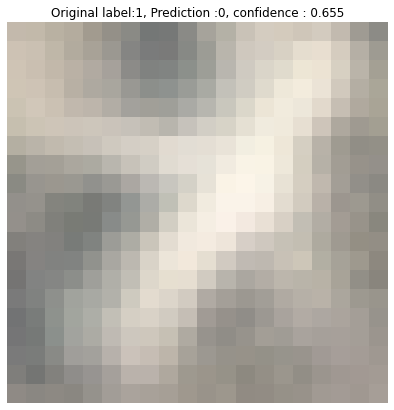

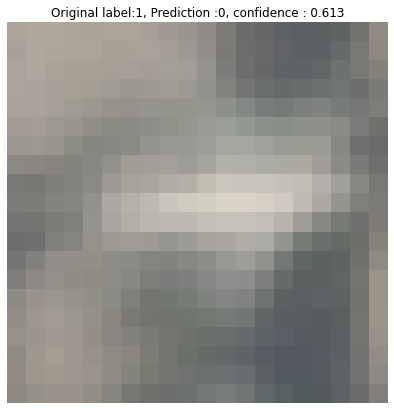

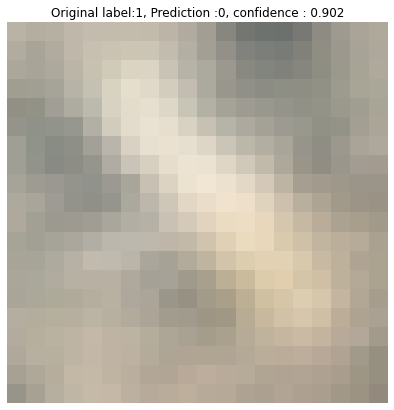

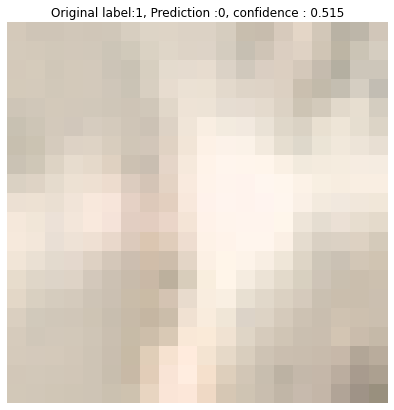

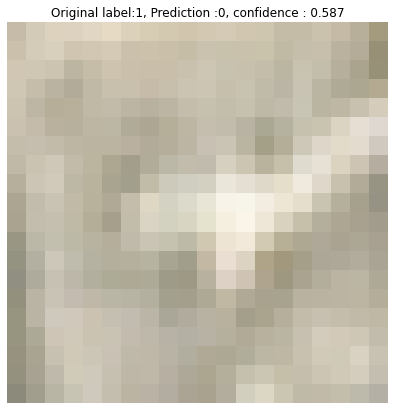

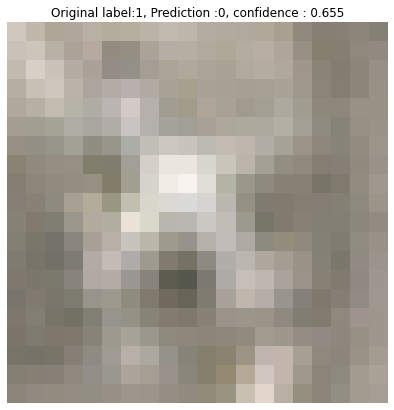

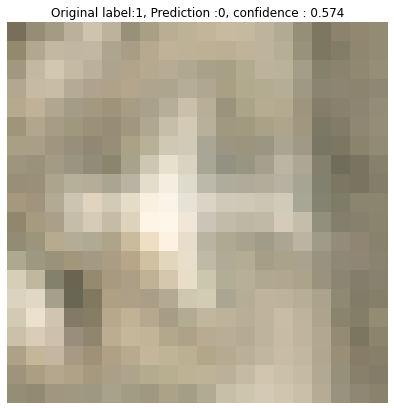

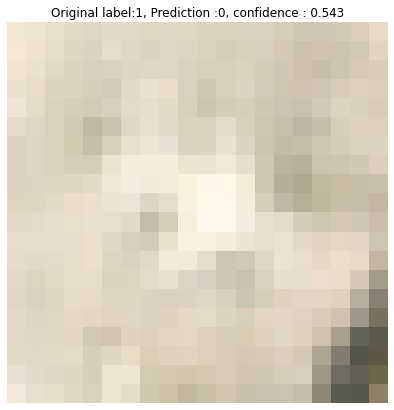

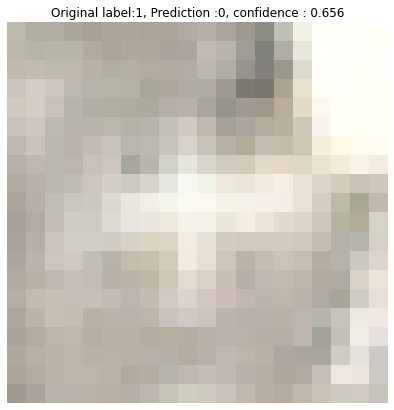

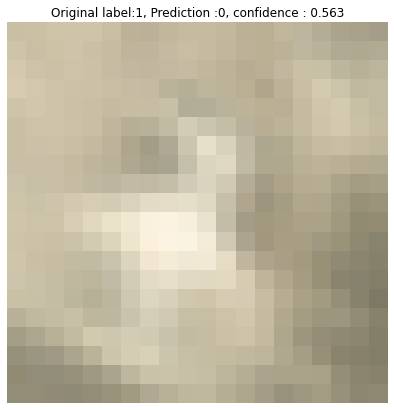

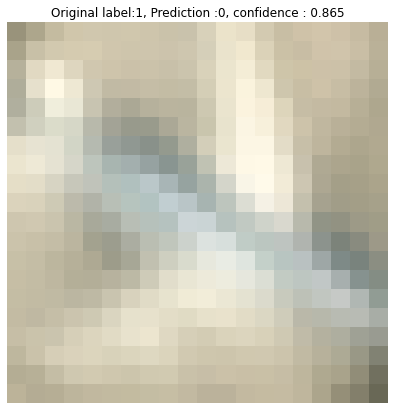

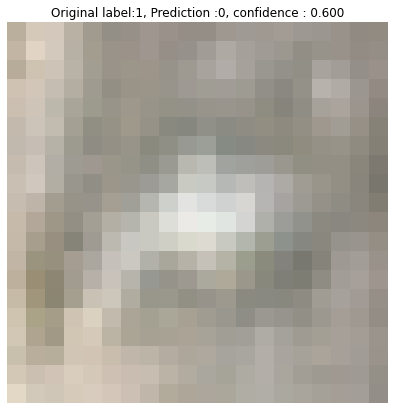

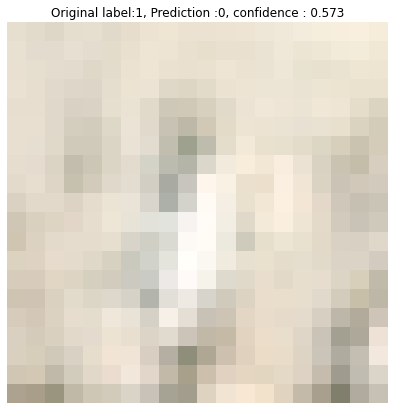

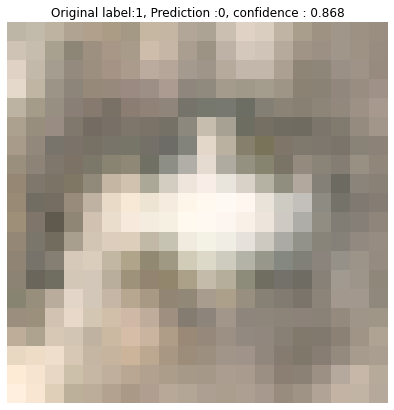

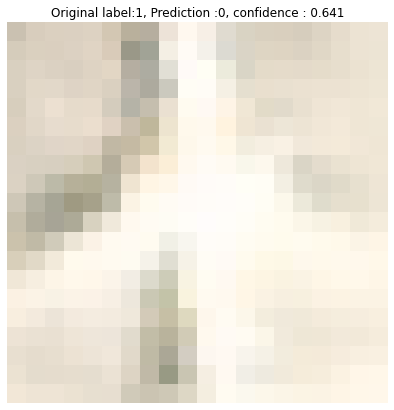

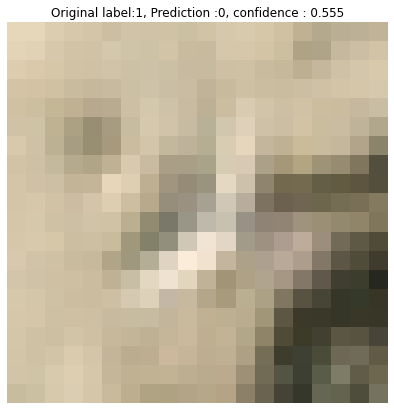

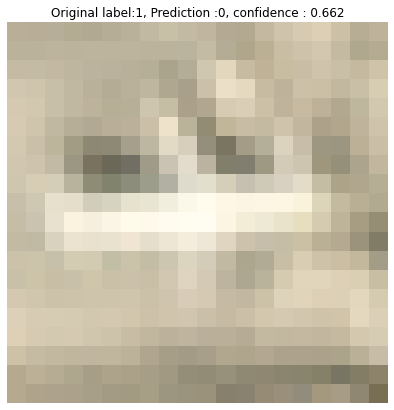

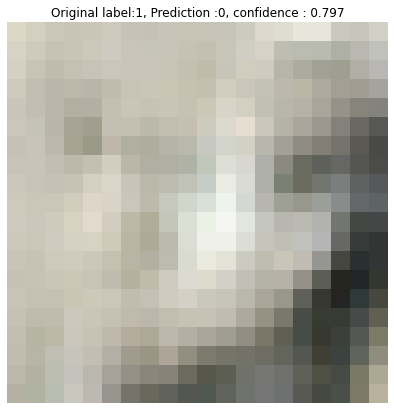

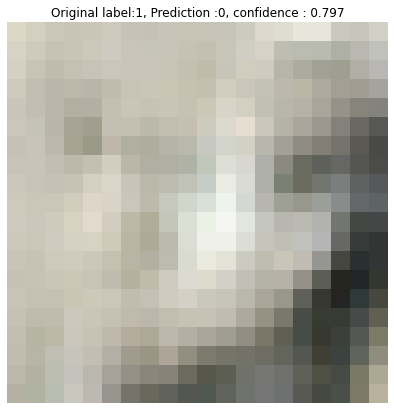

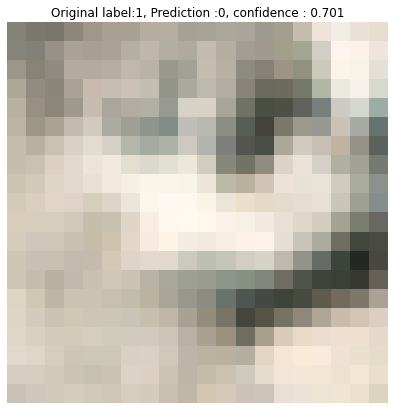

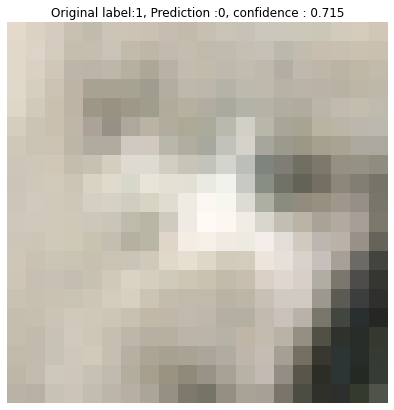

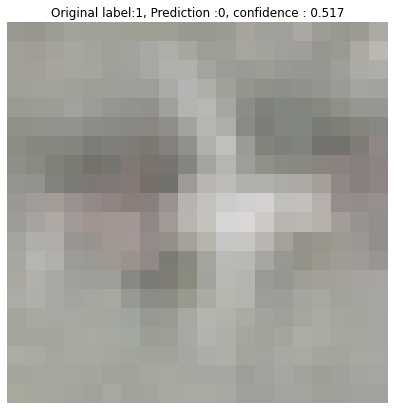

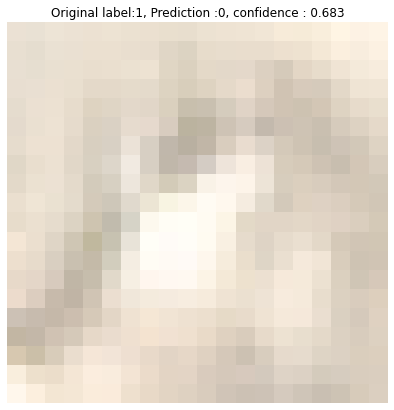

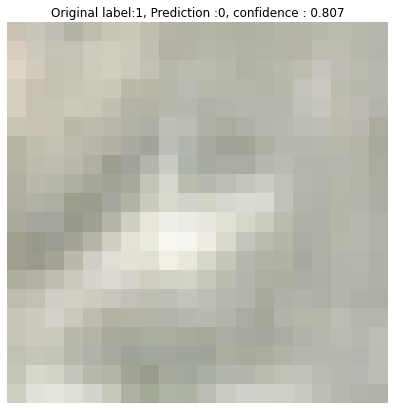

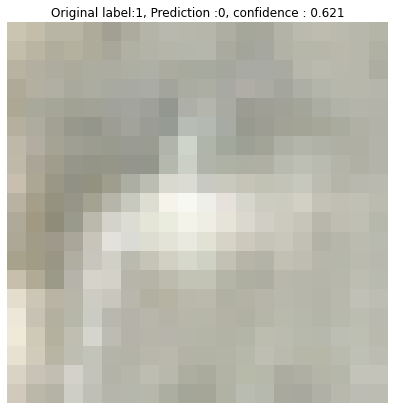

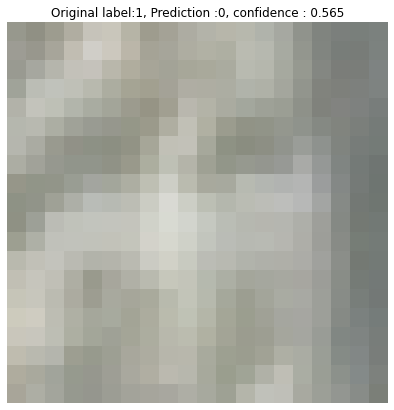

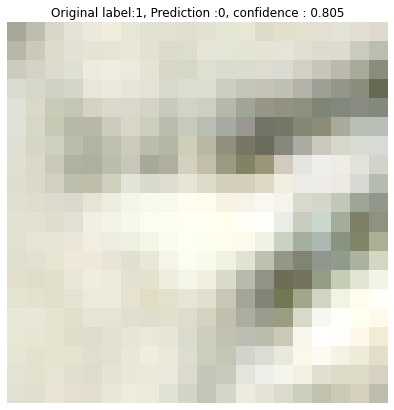

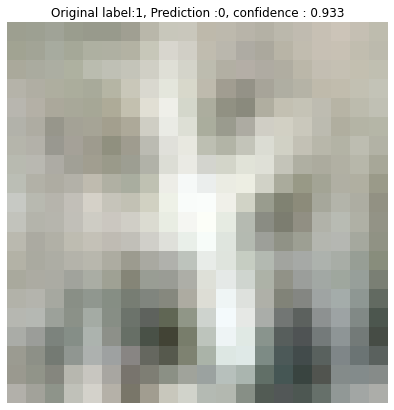

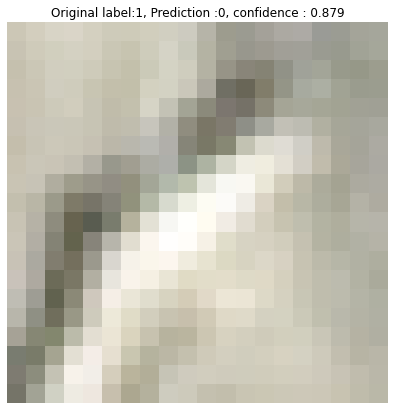

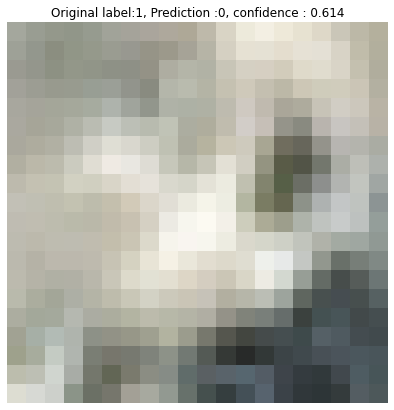

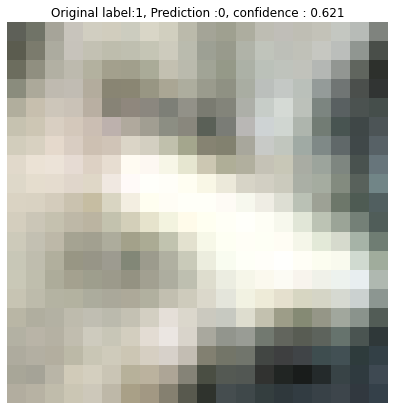

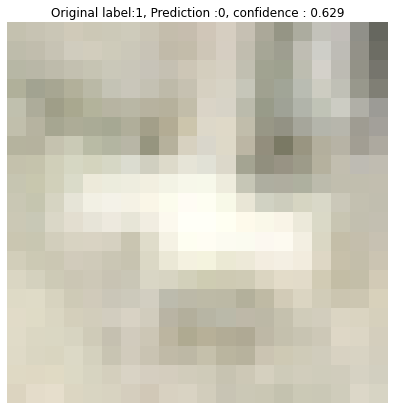

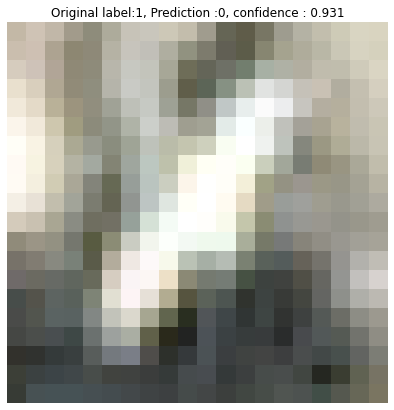

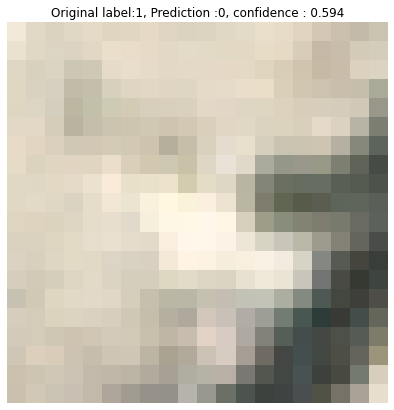

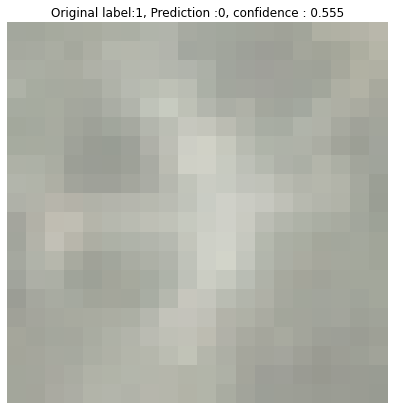

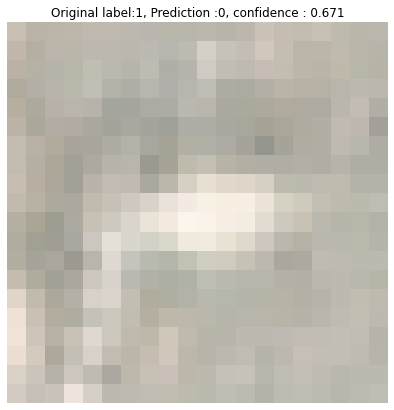

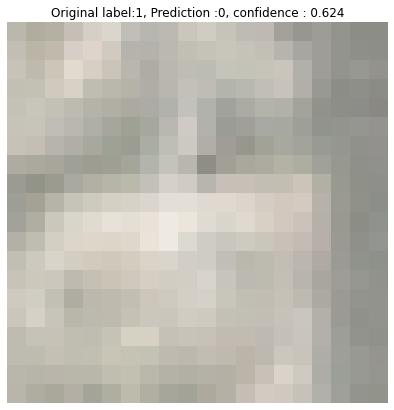

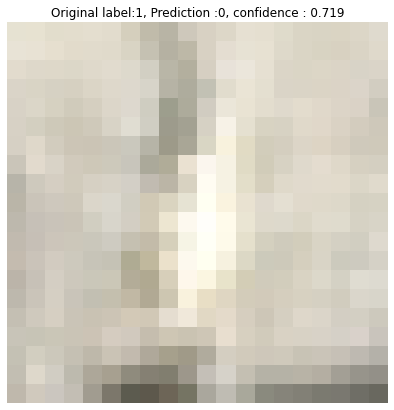

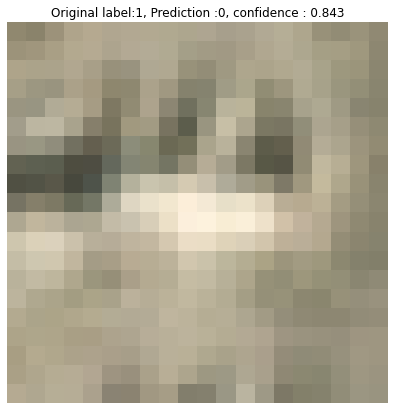

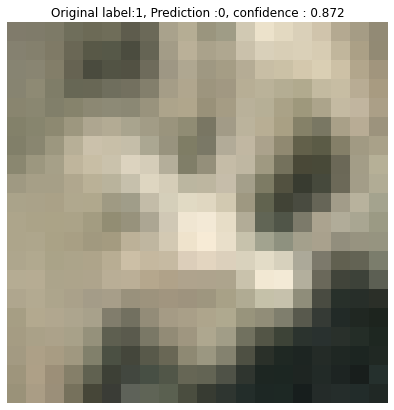

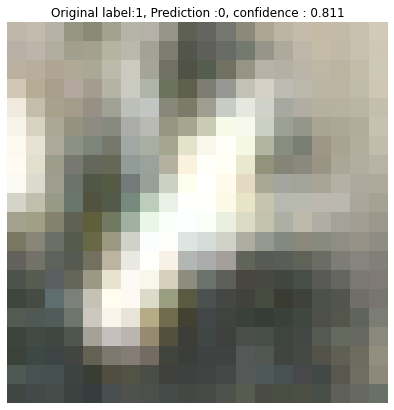

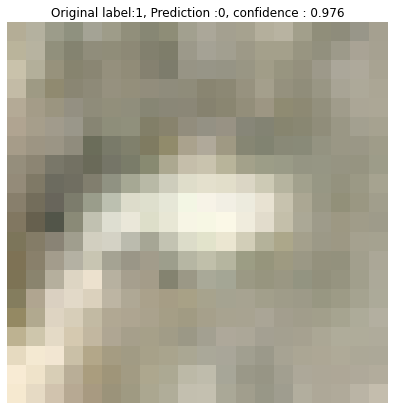

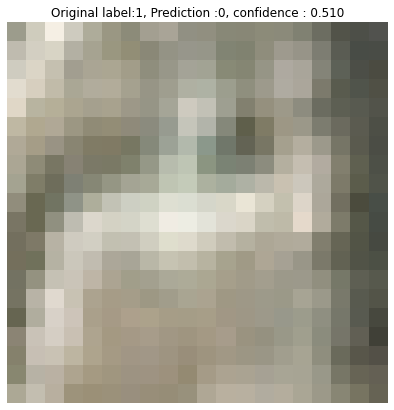

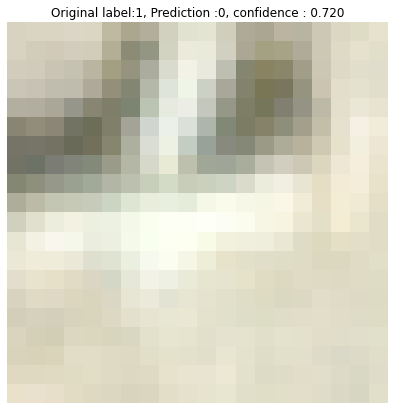

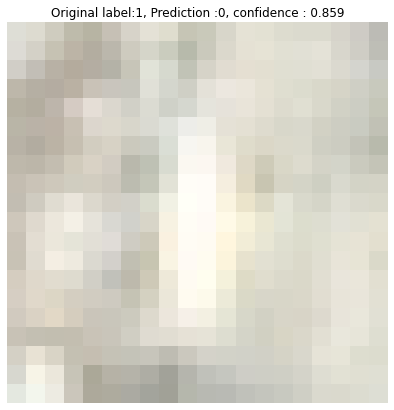

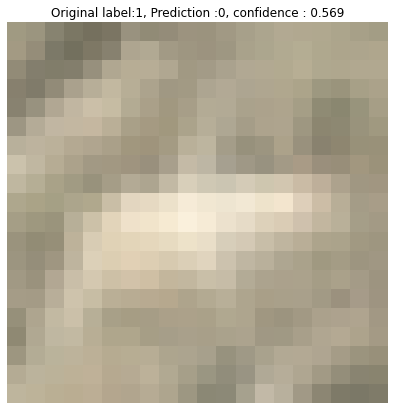

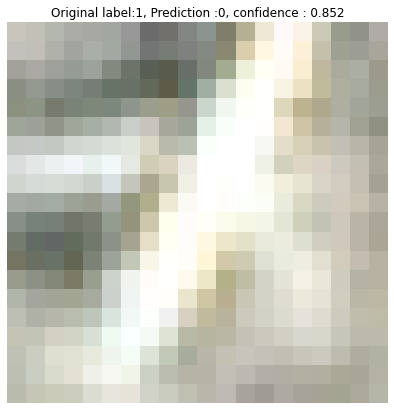

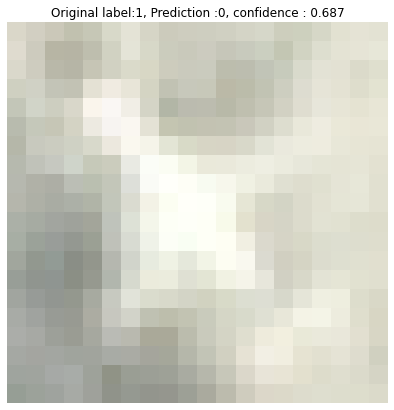

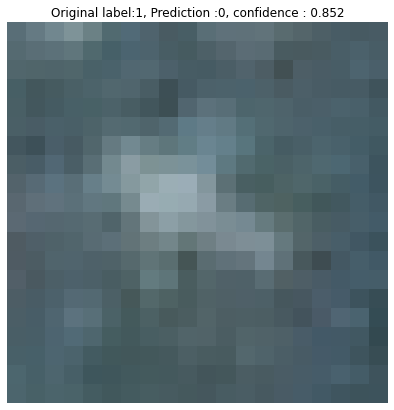

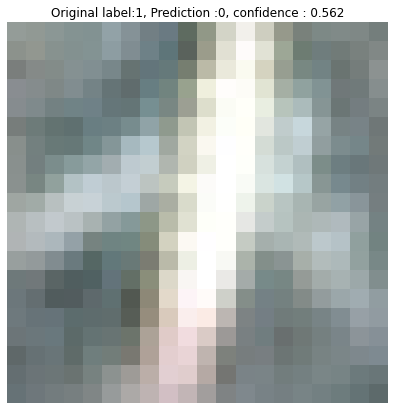

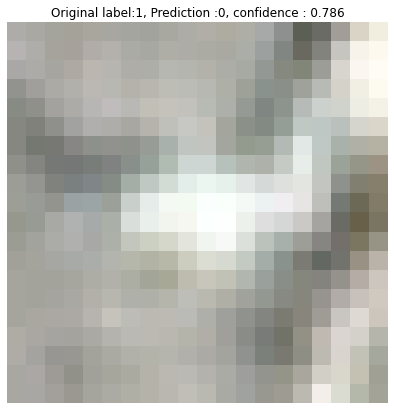

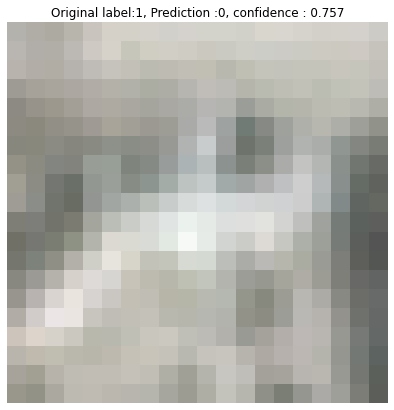

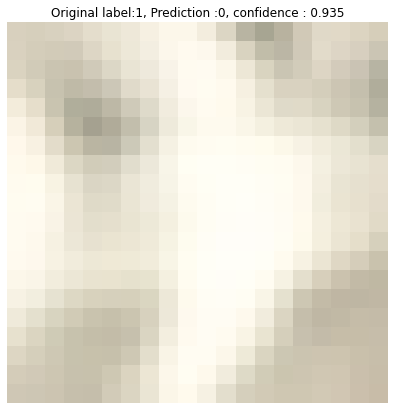

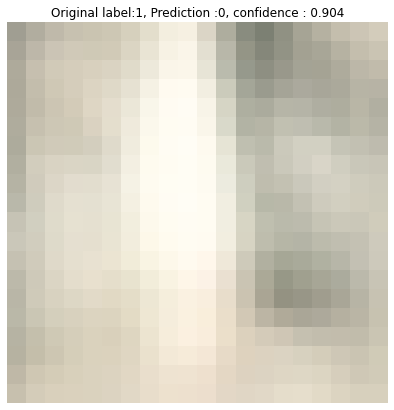

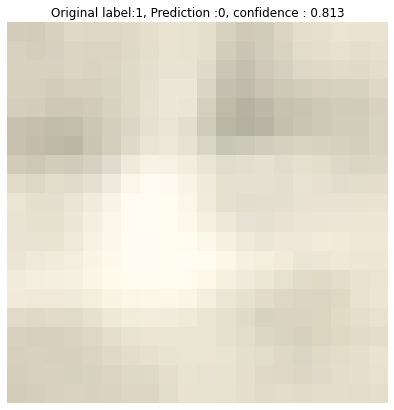

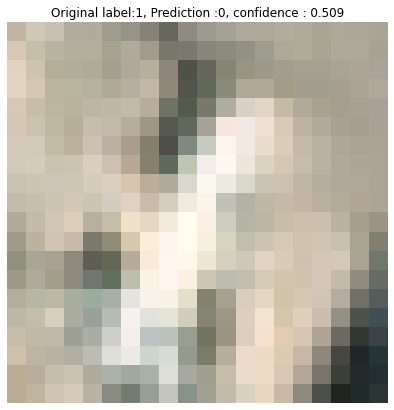

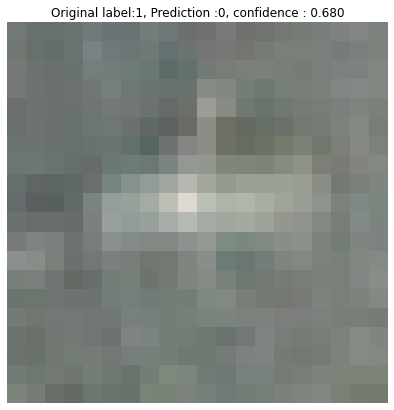

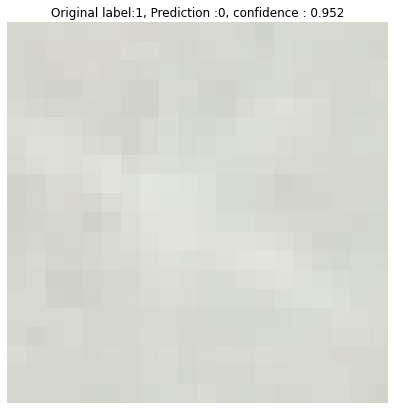

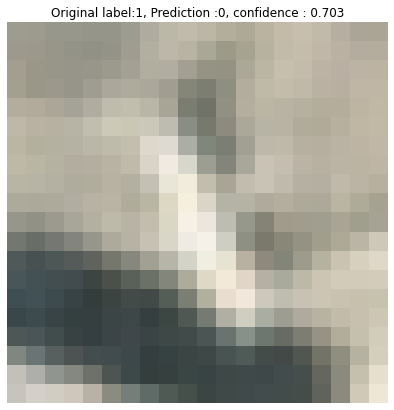

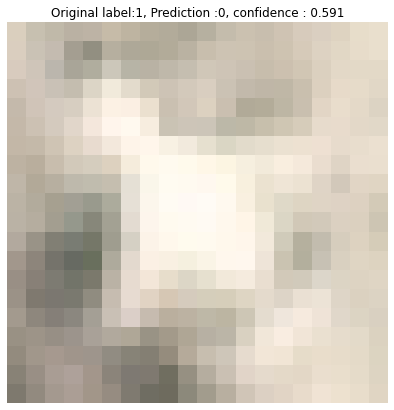

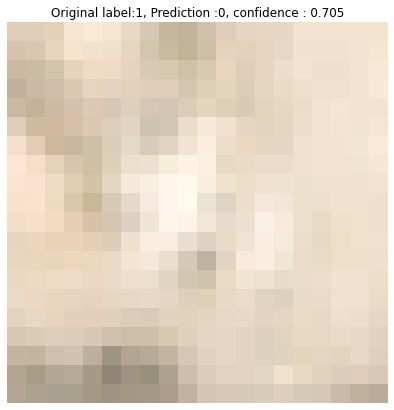

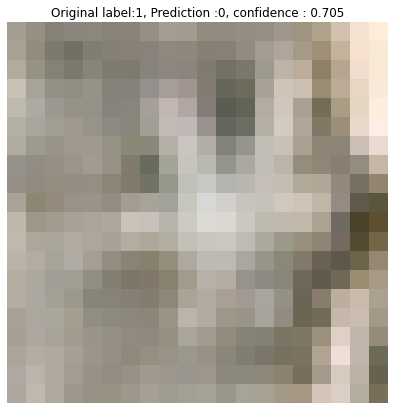

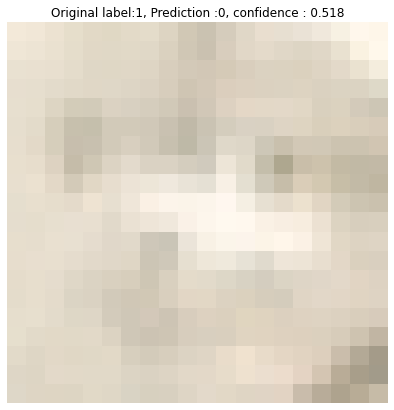

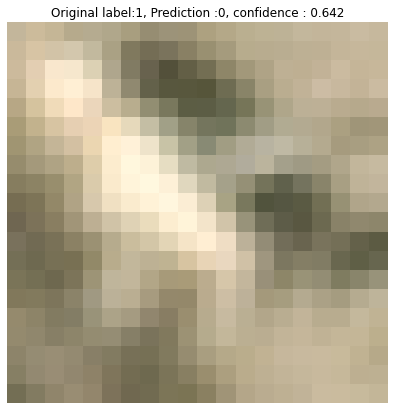

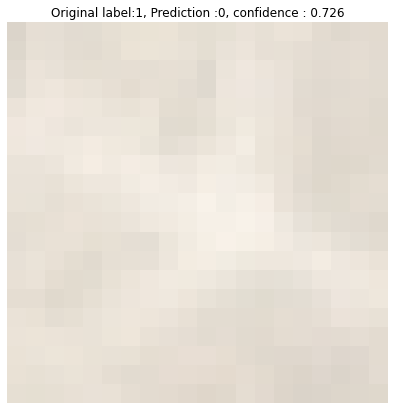

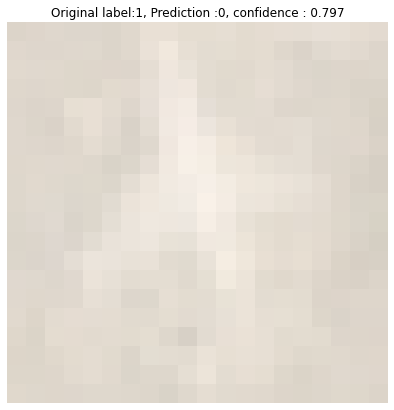

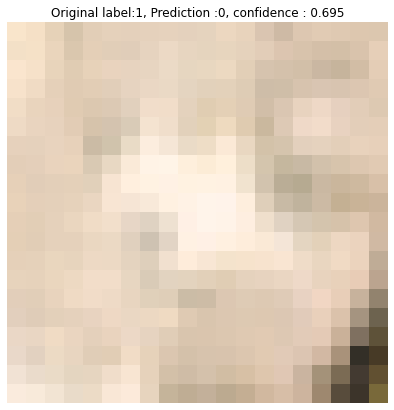

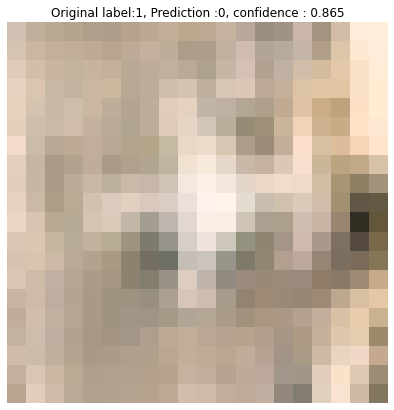

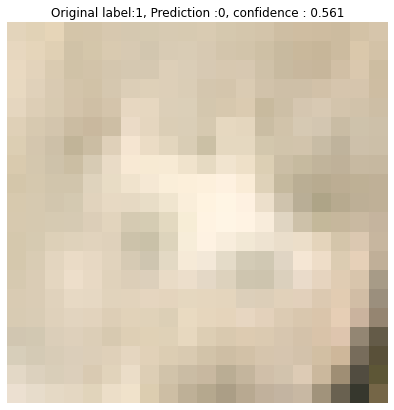

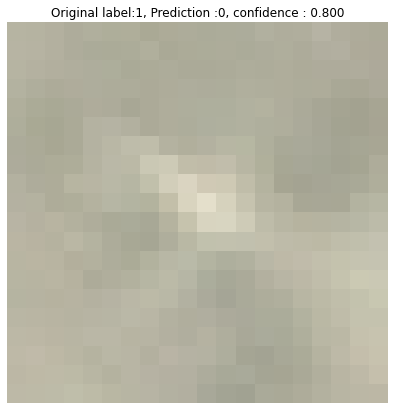

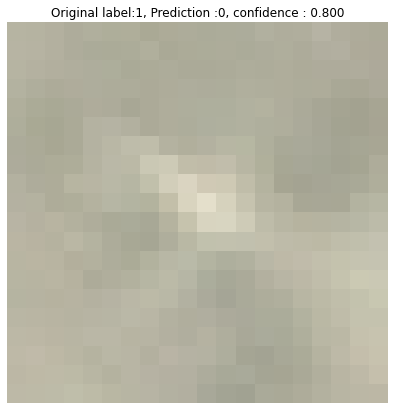

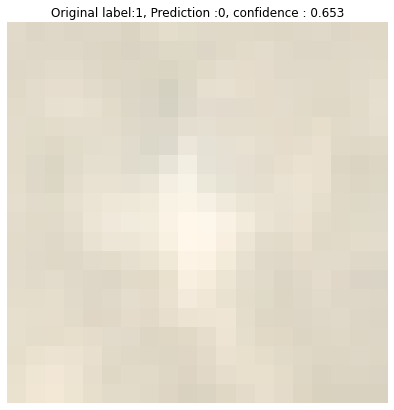

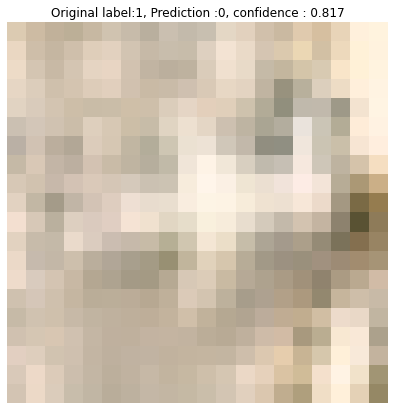

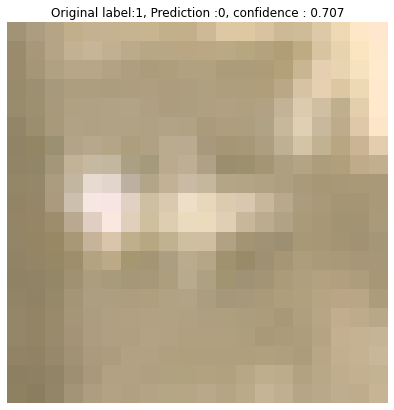

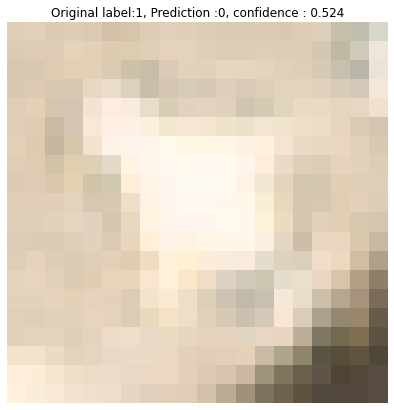

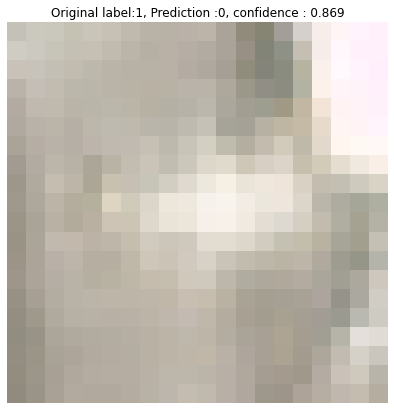

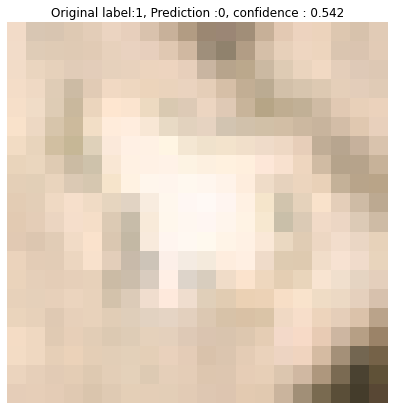

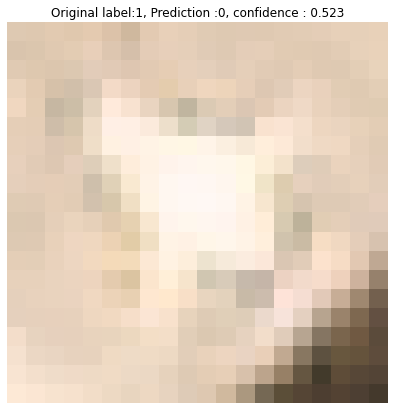

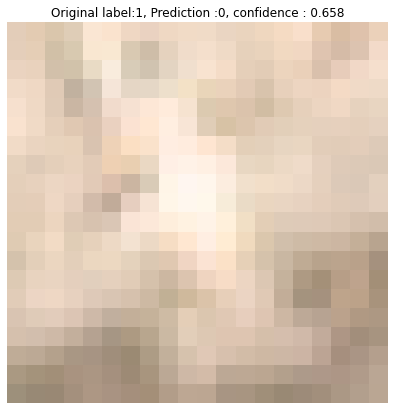

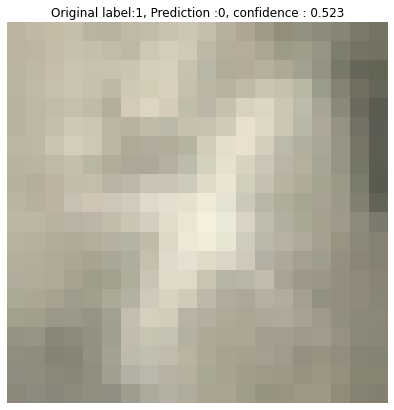

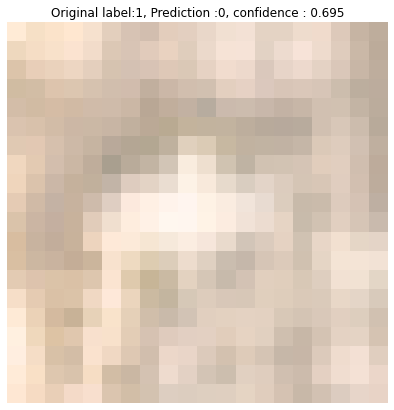

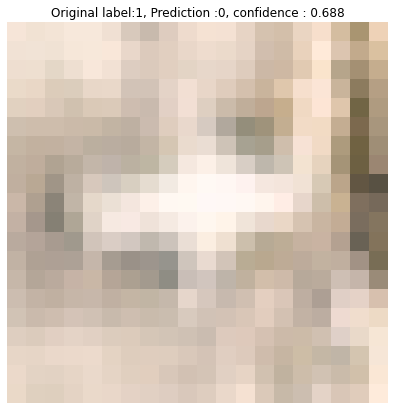

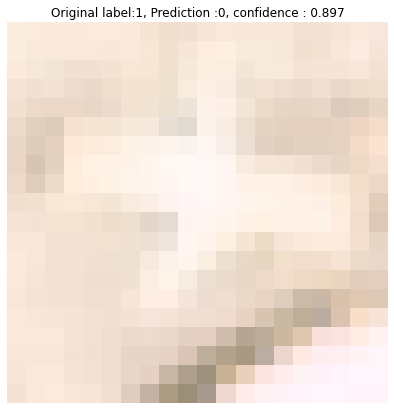

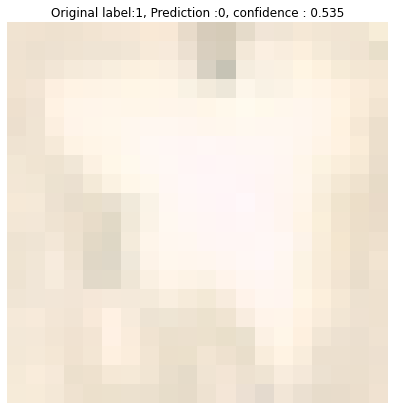

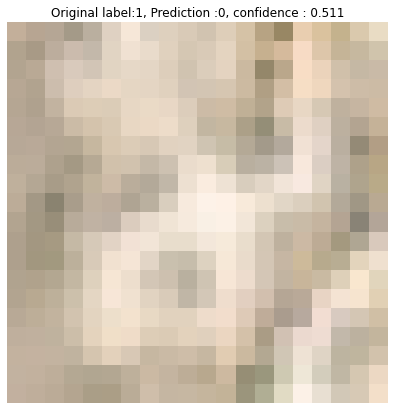

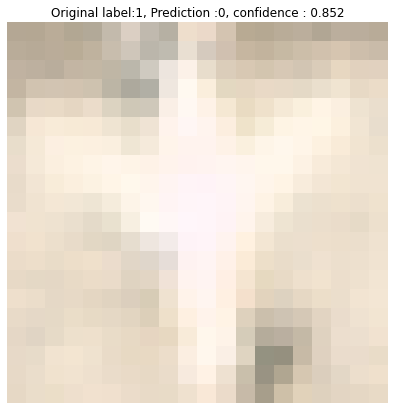

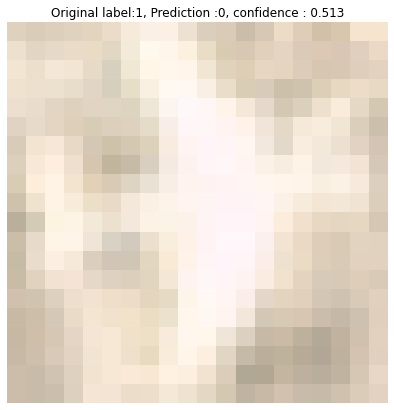

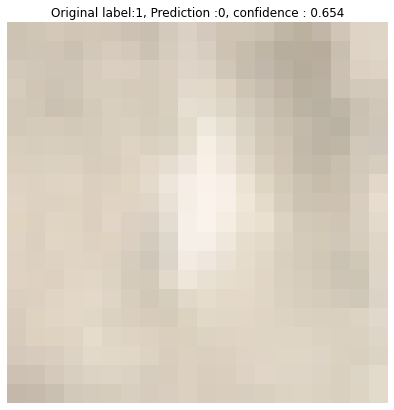

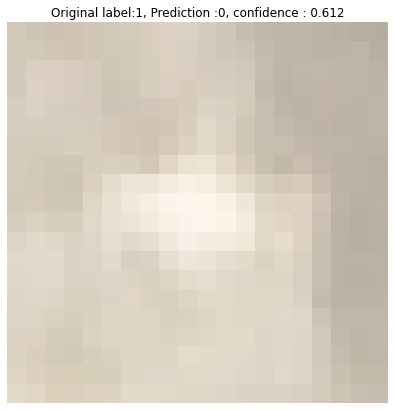

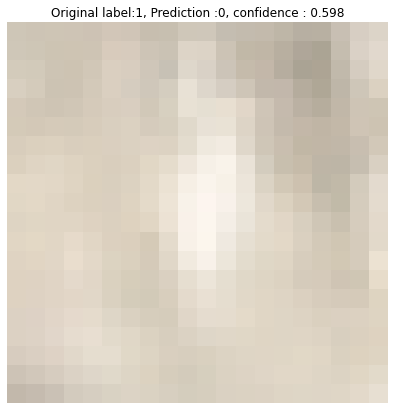

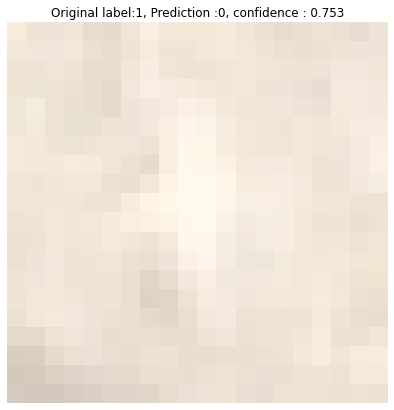

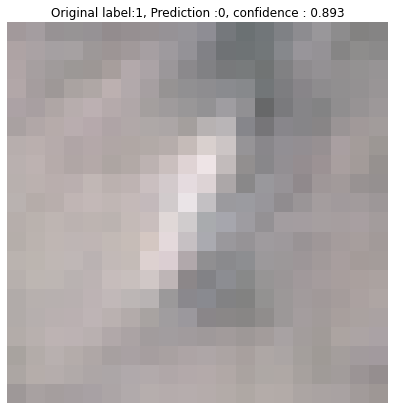

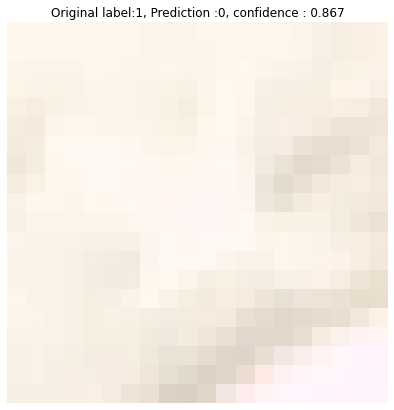

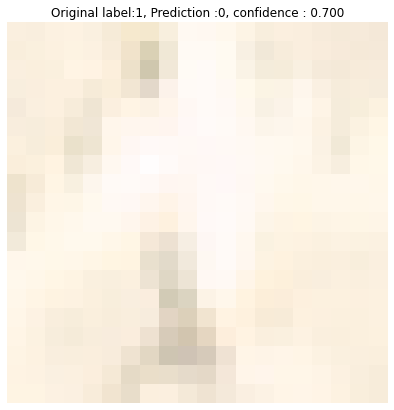

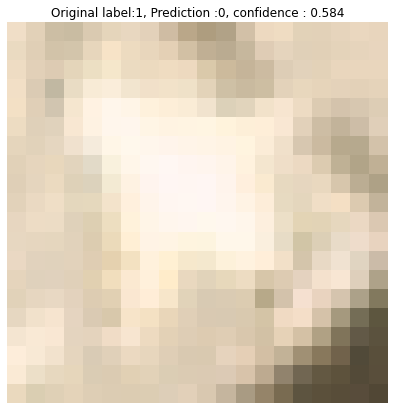

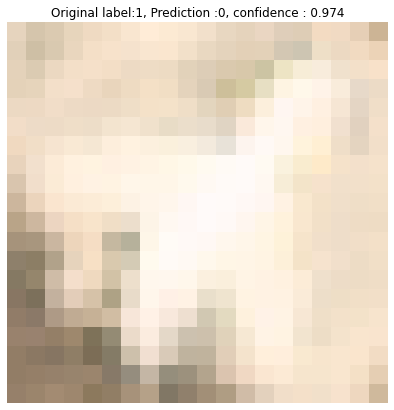

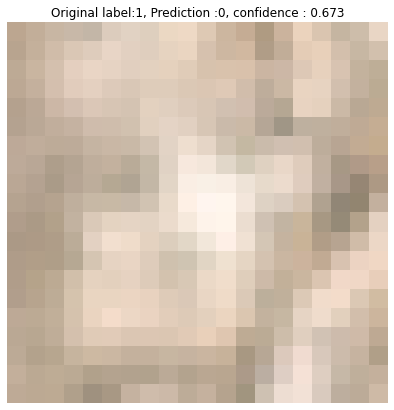

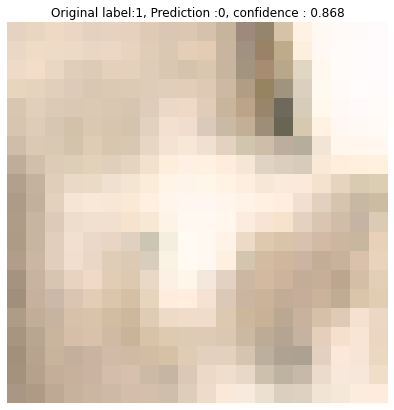

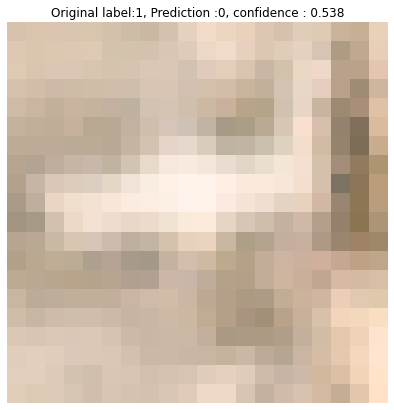

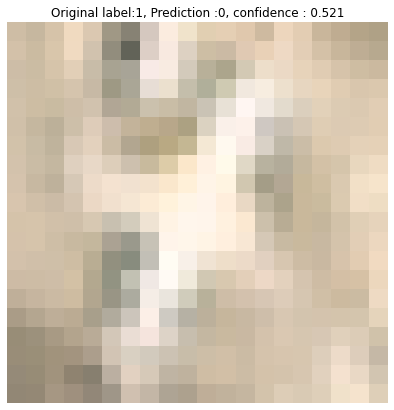

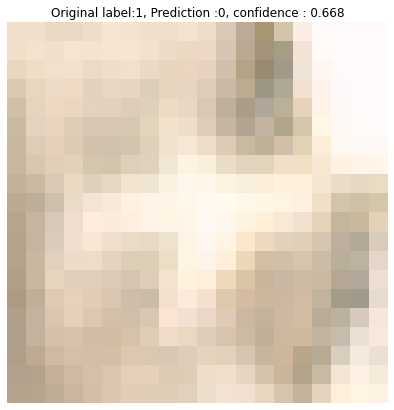

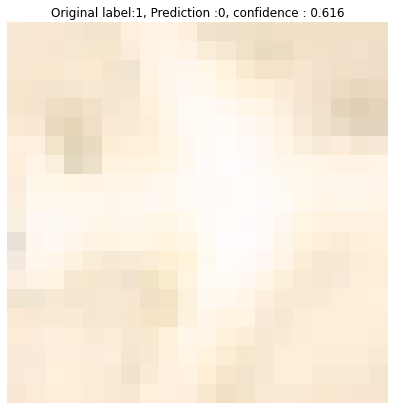

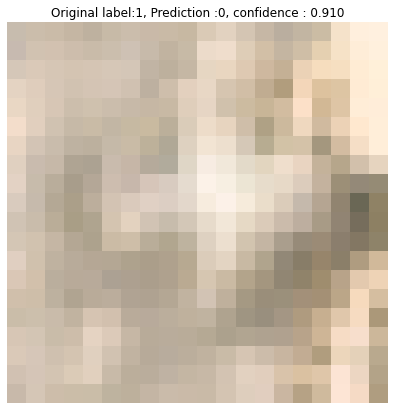

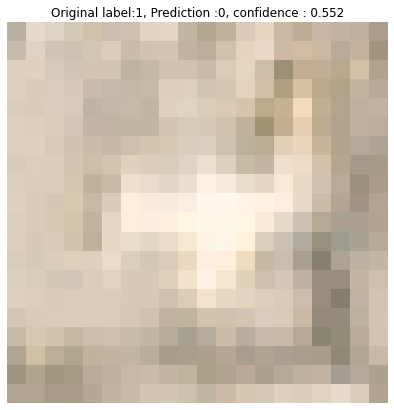

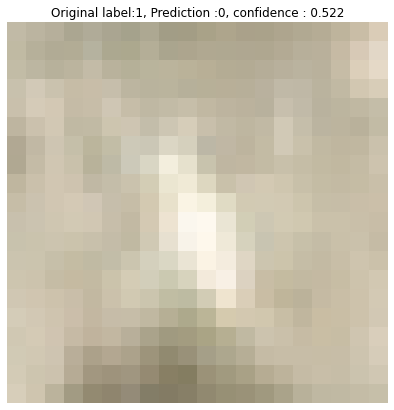

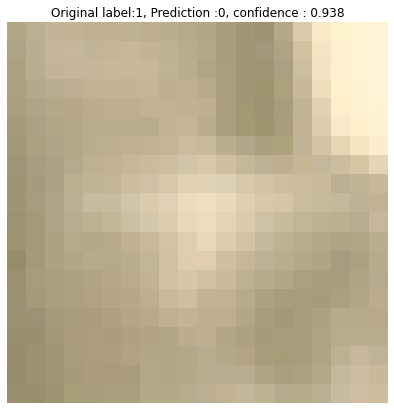

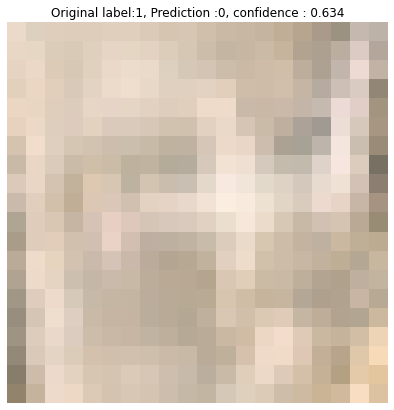

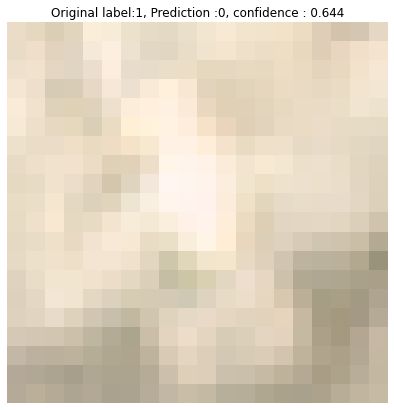

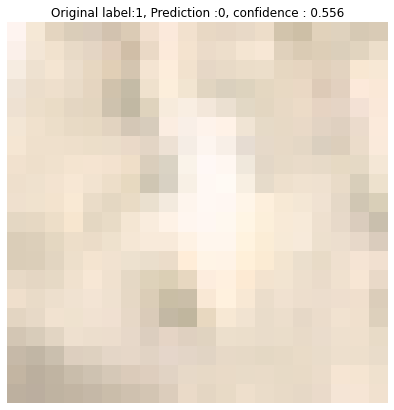

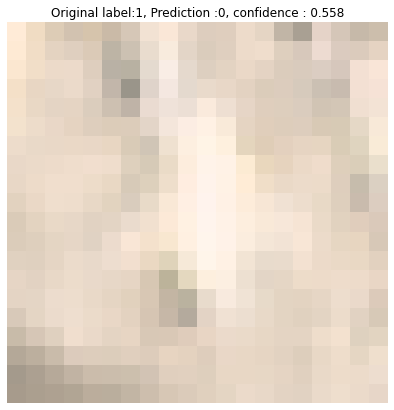

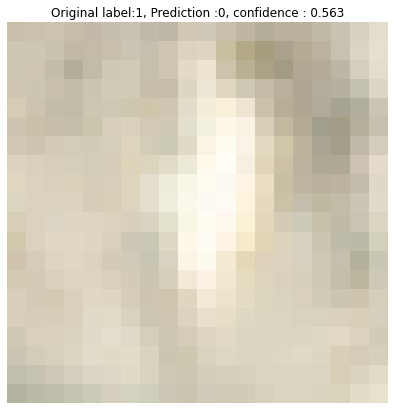

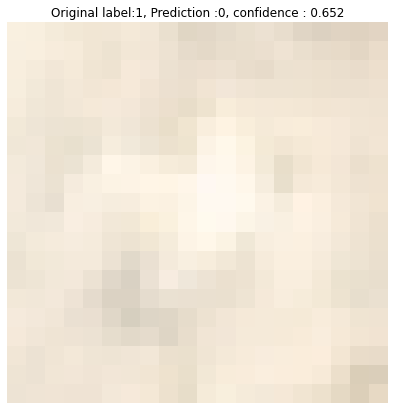

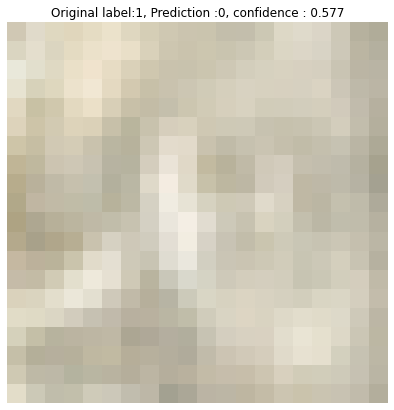

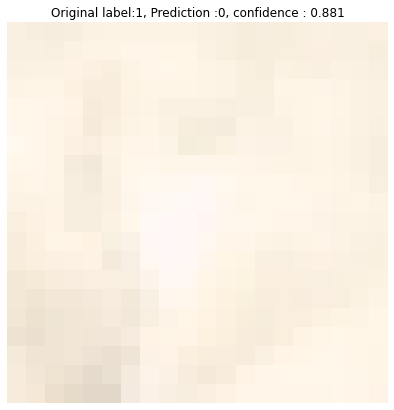

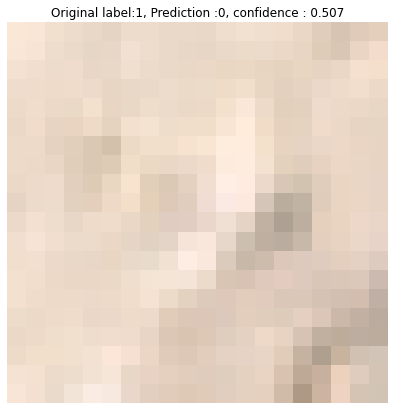

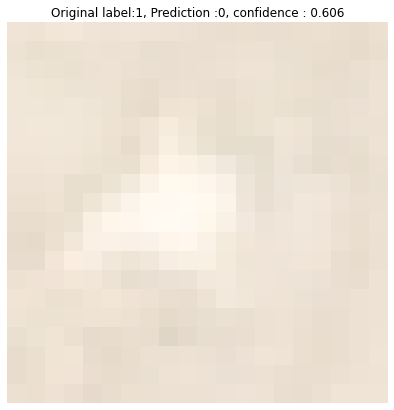

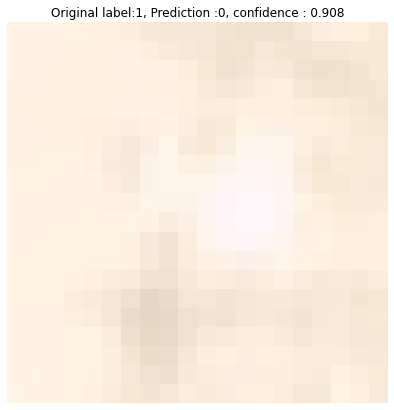

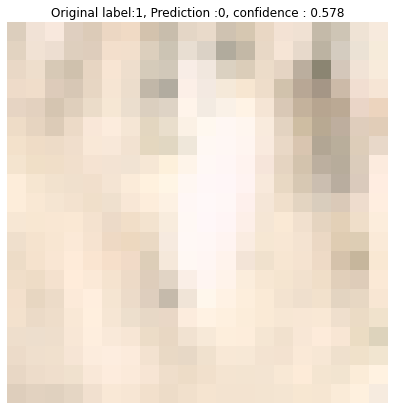

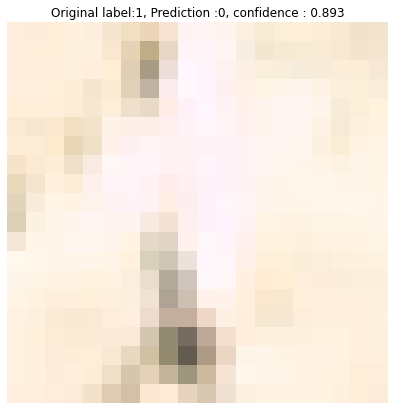

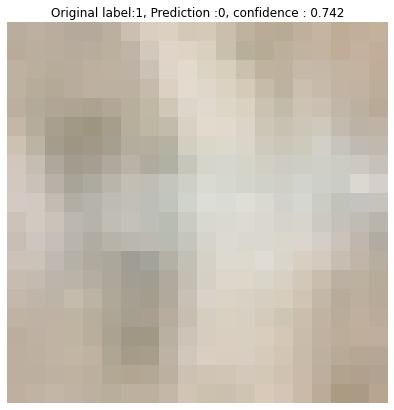

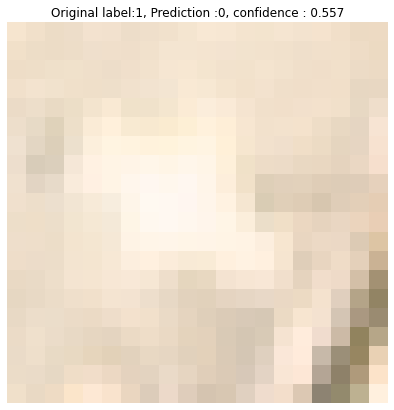

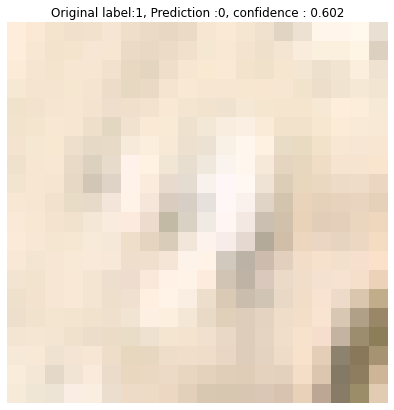

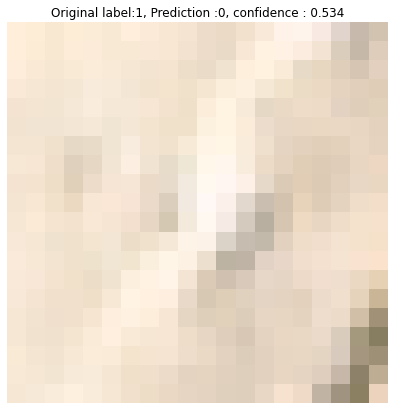

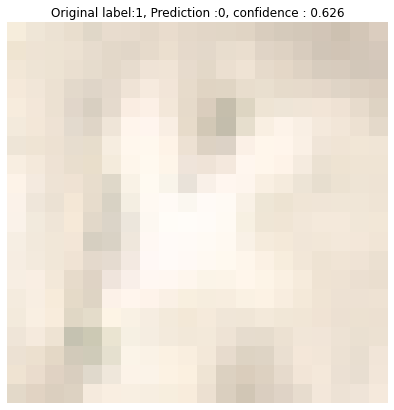

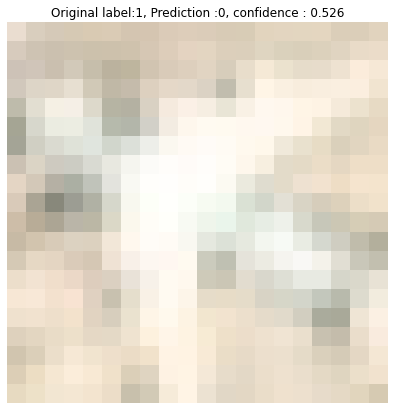

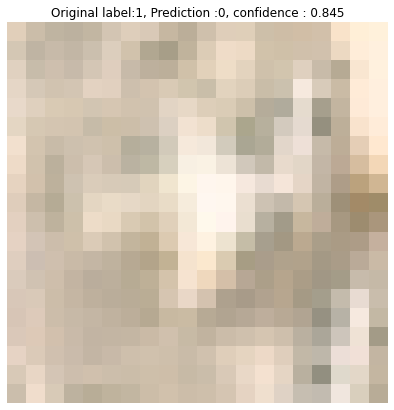

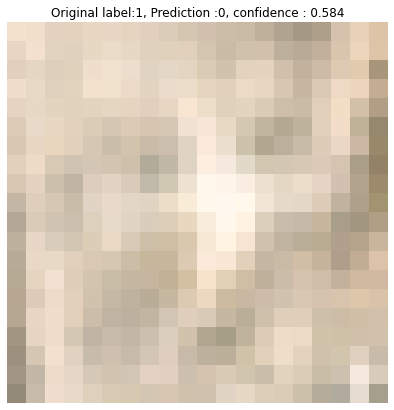

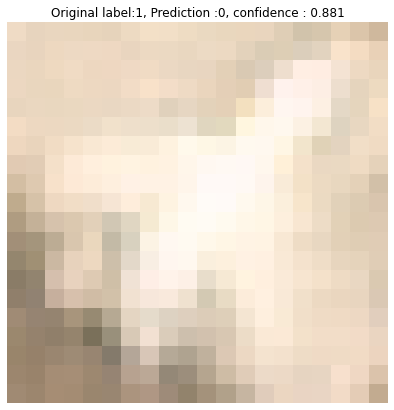

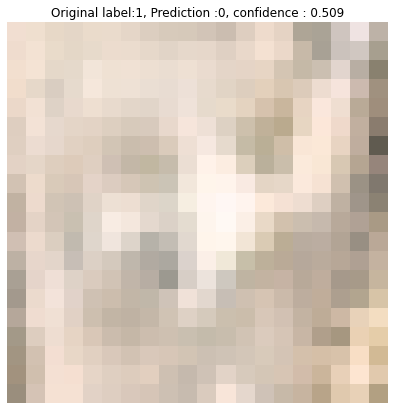

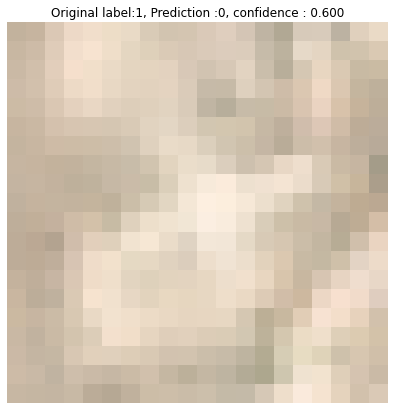

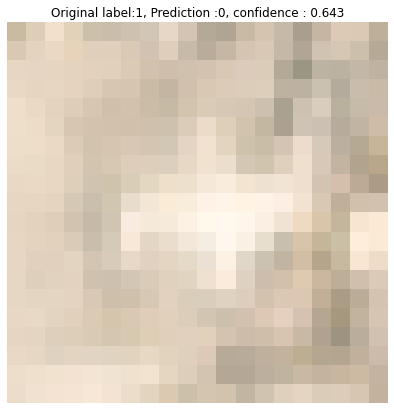

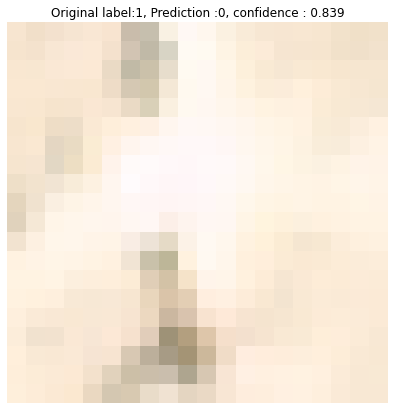

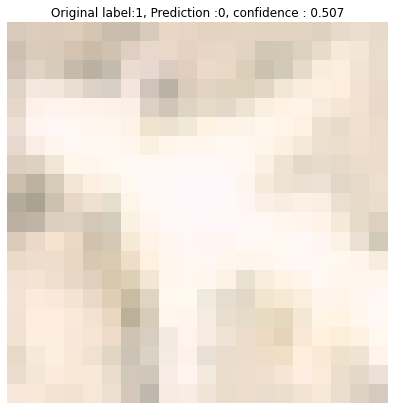

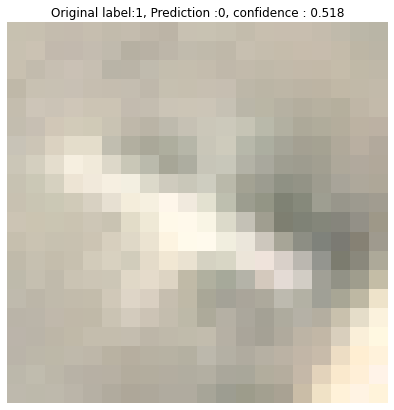

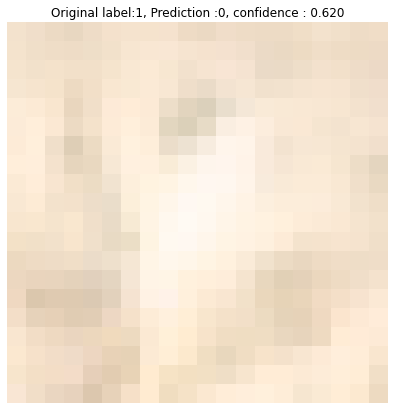

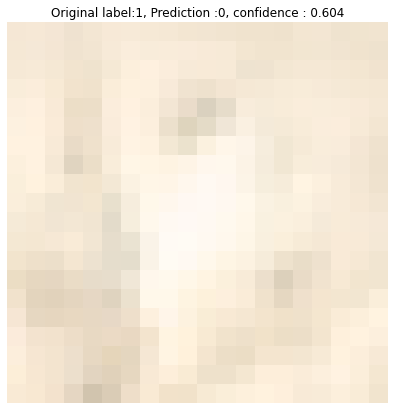

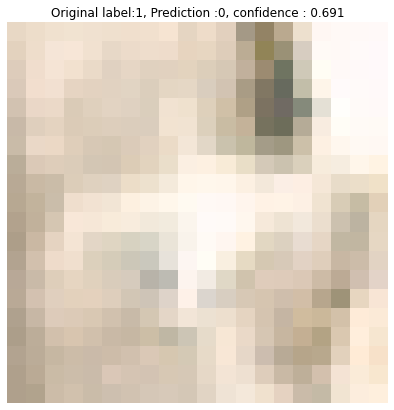

In [ ]:
# Get the predictions from the model using the generator
predictions = model.predict(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)

# Run the function to get the list of classes and errors
idx2label, errors, fnames = obtain_errors(validation_generator, predictions)

# Run the function to illustrate the error cases
show_errors(idx2label, errors, predictions, fnames)